### We will investigate and assess the underlying temporal patterns from consecutive historical observations of the COVID-19 pandemic in the United Kingdom, Australia, and Sweden. 

#### With a focus on three main features:-

- **New cases**
- **New death**
- **Restriction**
- **Proportion of vaccinated people**

#### Import modules

In [200]:
!pip install altair
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import altair as alt
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### Load dataset

In [90]:
df = pd.read_csv('owid-covid-data.csv')
df = df[(df['location'] == 'United Kingdom') | (df['location'] == 'Sweden') | (df['location'] == 'Australia')]
df

iso_code continent        location        date  total_cases  new_cases  \
10720       AUS   Oceania       Australia  2020-01-26          4.0        4.0   
10721       AUS   Oceania       Australia  2020-01-27          5.0        1.0   
10722       AUS   Oceania       Australia  2020-01-28          5.0        0.0   
10723       AUS   Oceania       Australia  2020-01-29          6.0        1.0   
10724       AUS   Oceania       Australia  2020-01-30          9.0        3.0   
...         ...       ...             ...         ...          ...        ...   
194259      GBR    Europe  United Kingdom  2022-07-30   23392406.0        0.0   
194260      GBR    Europe  United Kingdom  2022-07-31   23392406.0        0.0   
194261      GBR    Europe  United Kingdom  2022-08-01   23392406.0        0.0   
194262      GBR    Europe  United Kingdom  2022-08-02   23392406.0        0.0   
194263      GBR    Europe  United Kingdom  2022-08-03   23457100.0    64694.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
10720                  NaN           NaN         NaN                  NaN   
10721                  NaN           NaN         NaN                  NaN   
10722                  NaN           NaN         NaN                  NaN   
10723                  NaN           NaN         NaN                  NaN   
10724                  NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
194259           13242.714      184140.0         0.0              175.429   
194260           13242.714      184140.0         0.0              175.429   
194261           13242.714      184140.0         0.0              175.429   
194262           13242.714      184140.0         0.0              175.286   
194263            9308.000      185245.0      1105.0              158.000   

        ...  female_smokers  male_smokers  handwashing_facilities  \
10720   ...            13.0          16.5                     NaN   
10721   ...            13.0          16.5                     NaN   
10722   ...            13.0          16.5                     NaN   
10723   ...            13.0          16.5                     NaN   
10724   ...            13.0          16.5                     NaN   
...     ...             ...           ...                     ...   
194259  ...            20.0          24.7                     NaN   
194260  ...            20.0          24.7                     NaN   
194261  ...            20.0          24.7                     NaN   
194262  ...            20.0          24.7                     NaN   
194263  ...            20.0          24.7                     NaN   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
10720                         3.84            83.44                    0.944   
10721                         3.84            83.44                    0.944   
10722                         3.84            83.44                    0.944   
10723                         3.84            83.44                    0.944   
10724                         3.84            83.44                    0.944   
...                            ...              ...                      ...   
194259                        2.54            81.32                    0.932   
194260                        2.54            81.32                    0.932   
194261                        2.54            81.32                    0.932   
194262                        2.54            81.32                    0.932   
194263                        2.54            81.32                    0.932   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
10720                                  -47.0                         -0.4   
10721                                    NaN                          NaN   
10722                                    NaN                          NaN   
10723      

In [91]:
#getting the first 10 rows

df.head(10)

iso_code continent   location        date  total_cases  new_cases  \
10720      AUS   Oceania  Australia  2020-01-26          4.0        4.0   
10721      AUS   Oceania  Australia  2020-01-27          5.0        1.0   
10722      AUS   Oceania  Australia  2020-01-28          5.0        0.0   
10723      AUS   Oceania  Australia  2020-01-29          6.0        1.0   
10724      AUS   Oceania  Australia  2020-01-30          9.0        3.0   
10725      AUS   Oceania  Australia  2020-01-31          9.0        0.0   
10726      AUS   Oceania  Australia  2020-02-01         12.0        3.0   
10727      AUS   Oceania  Australia  2020-02-02         12.0        0.0   
10728      AUS   Oceania  Australia  2020-02-03         12.0        0.0   
10729      AUS   Oceania  Australia  2020-02-04         13.0        1.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
10720                 NaN           NaN         NaN                  NaN  ...   
10721                 NaN           NaN         NaN                  NaN  ...   
10722                 NaN           NaN         NaN                  NaN  ...   
10723                 NaN           NaN         NaN                  NaN  ...   
10724                 NaN           NaN         NaN                  NaN  ...   
10725               1.286           NaN         NaN                  NaN  ...   
10726               1.714           NaN         NaN                  NaN  ...   
10727               1.143           NaN         NaN                  NaN  ...   
10728               1.000           NaN         NaN                  NaN  ...   
10729               1.143           NaN         NaN                  NaN  ...   

       female_smokers  male_smokers  handwashing_facilities  \
10720            13.0          16.5                     NaN   
10721            13.0          16.5                     NaN   
10722            13.0          16.5                     NaN   
10723            13.0          16.5                     NaN   
10724            13.0          16.5                     NaN   
10725            13.0          16.5                     NaN   
10726            13.0          16.5                     NaN   
10727            13.0          16.5                     NaN   
10728            13.0          16.5                     NaN   
10729            13.0          16.5                     NaN   

       hospital_beds_per_thousand  life_expectancy  human_development_index  \
10720                        3.84            83.44                    0.944   
10721                        3.84            83.44                    0.944   
10722                        3.84            83.44                    0.944   
10723                        3.84            83.44                    0.944   
10724                        3.84            83.44                    0.944   
10725                        3.84            83.44                    0.944   
10726                        3.84            83.44                    0.944   
10727                        3.84            83.44                    0.944   
10728                        3.84            83.44                    0.944   
10729                        3.84            83.44                    0.944   

       excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
10720                                 -47.0                        -0.40   
10721                                   NaN                          NaN   
10722                                   NaN                          NaN   
10723                                   NaN                          NaN   
10724                                   NaN                          NaN   
10725                                   NaN                          NaN   
10726                                   NaN                          NaN   
10727                                 -33.2                        -0.23   
10728                                   

In [92]:
#displaying information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 10720 to 194263
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    2752 non-null   object 
 1   continent                                   2752 non-null   object 
 2   location                                    2752 non-null   object 
 3   date                                        2752 non-null   object 
 4   total_cases                                 2752 non-null   float64
 5   new_cases                                   2740 non-null   float64
 6   new_cases_smoothed                          2725 non-null   float64
 7   total_deaths                                2644 non-null   float64
 8   new_deaths                                  2624 non-null   float64
 9   new_deaths_smoothed                         2609 non-null   float64
 10  total_

In [93]:
#number of rows and columns in the df

df.shape

(2752, 67)

In [94]:
#number of elements in the df

df.size

184384

In [95]:
# getting the features with more distinct elements and relation 

df.nunique()

iso_code                                      3
continent                                     2
location                                      3
date                                        921
total_cases                                2240
                                           ... 
human_development_index                       3
excess_mortality_cumulative_absolute        374
excess_mortality_cumulative                 327
excess_mortality                            350
excess_mortality_cumulative_per_million     375
Length: 67, dtype: int64

#### Data preprocessing

#### Based on the date, we will extract the following features for the three countries from the dataset:- 

**total_cases**

**new_cases** 

**total_deaths** 

**new_deaths** 

**people_vaccinated_per_hundred**

**people_fully_vaccinated_per_hundred** 

**new_deaths_per_million** 

**new_cases_per_million**

In [96]:
#Selecting the 7 key columns in the dataset that has more unique records and works well for the forecasting
df = df[["location",'date','total_cases','new_cases',
         'total_deaths','new_deaths',
         'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
         'new_deaths_per_million', 'new_cases_per_million']].copy()

In [97]:
#Convert to datetime
df.date = pd.to_datetime(df['date'])

In [98]:
###### detecting missing values
df.isnull().sum()

location                                  0
date                                      0
total_cases                               0
new_cases                                12
total_deaths                            108
new_deaths                              128
people_vaccinated_per_hundred          1598
people_fully_vaccinated_per_hundred    1599
new_deaths_per_million                  128
new_cases_per_million                    12
dtype: int64

#### Handling missing values

In [99]:
#using mean imputation
cols_2 = ['new_cases', "total_deaths", "new_deaths", "new_deaths_per_million", "new_cases_per_million",
          "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred"]
for i in cols_2:
    df[i] = df[i].fillna(df[i].mean())
df

location       date  total_cases  new_cases   total_deaths  \
10720        Australia 2020-01-26          4.0        4.0   40539.314675   
10721        Australia 2020-01-27          5.0        1.0   40539.314675   
10722        Australia 2020-01-28          5.0        0.0   40539.314675   
10723        Australia 2020-01-29          6.0        1.0   40539.314675   
10724        Australia 2020-01-30          9.0        3.0   40539.314675   
...                ...        ...          ...        ...            ...   
194259  United Kingdom 2022-07-30   23392406.0        0.0  184140.000000   
194260  United Kingdom 2022-07-31   23392406.0        0.0  184140.000000   
194261  United Kingdom 2022-08-01   23392406.0        0.0  184140.000000   
194262  United Kingdom 2022-08-02   23392406.0        0.0  184140.000000   
194263  United Kingdom 2022-08-03   23457100.0    64694.0  185245.000000   

         new_deaths  people_vaccinated_per_hundred  \
10720     81.003811                      60.419818   
10721     81.003811                      60.419818   
10722     81.003811                      60.419818   
10723     81.003811                      60.419818   
10724     81.003811                      60.419818   
...             ...                            ...   
194259     0.000000                      60.419818   
194260     0.000000                      60.419818   
194261     0.000000                      60.419818   
194262     0.000000                      60.419818   
194263  1105.000000                      60.419818   

        people_fully_vaccinated_per_hundred  new_deaths_per_million  \
10720                             50.674232                1.913316   
10721                             50.674232                1.913316   
10722                             50.674232                1.913316   
10723                             50.674232                1.913316   
10724                             50.674232                1.913316   
...                                     ...                     ...   
194259                            50.674232                0.000000   
194260                            50.674232                0.000000   
194261                            50.674232                0.000000   
194262                            50.674232                0.000000   
194263                            50.674232               16.424000   

        new_cases_per_million  
10720                   0.154  
10721                   0.039  
10722                   0.000  
10723                   0.039  
10724                   0.116  
...                       ...  
194259                  0.000  
194260                  0.000  
194261                  0.000  
194262                  0.000  
194263                961.549  

[2752 rows x 10 columns]

In [100]:
df.isnull().sum()

location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
new_deaths_per_million                 0
new_cases_per_million                  0
dtype: int64

#### dropping duplicates

In [101]:
df.duplicated().sum() #this data has no dupliacte data

0

In [102]:
#Filtering data for period of time: 2020-02-01 - 2022-07-31
df = df[(df['date']>= '2020-02-01') & (df['date'] <='2022-07-31')]

In [103]:
#Time:
#All:
print(df['date'].min())
print(df['date'].max())

# We have data since 2020-01-26 to 2022-08-05

#UK
print(df[(df['location'] == 'United Kingdom')]['date'].min())
print(df[(df['location'] == 'United Kingdom')]['date'].max())

#2020-01-31
#2022-08-05

#Sweden
print(df[(df['location'] == 'Sweden')]['date'].min())
print(df[(df['location'] == 'Sweden')]['date'].max())

#2020-02-01
#2022-08-05

#Australia
print(df[(df['location'] == 'Australia')]['date'].min())
print(df[(df['location'] == 'Australia')]['date'].max())

#2020-01-26
#2022-08-05


#So, if we want to compare data, we should look at the same period of time: 2020-02-1 - 2022-08-05

2020-02-01 00:00:00
2022-07-31 00:00:00
2020-02-01 00:00:00
2022-07-31 00:00:00
2020-02-01 00:00:00
2022-07-31 00:00:00
2020-02-01 00:00:00
2022-07-31 00:00:00


In [104]:
# statistics summary
df.describe()

total_cases      new_cases   total_deaths   new_deaths  \
count  2.736000e+03    2736.000000    2736.000000  2736.000000   
mean   3.216438e+06   12673.603125   40435.937786    80.687664   
std    5.643589e+06   25529.641920   55962.760917   188.026359   
min    1.000000e+00       0.000000       1.000000     0.000000   
25%    3.079125e+04      10.750000    1837.500000     0.000000   
50%    7.040330e+05     937.500000   14451.000000    12.000000   
75%    3.802841e+06   14063.750000   41717.000000    81.000000   
max    2.339241e+07  225992.000000  184140.000000  1820.000000   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
count                    2736.000000                          2736.000000   
mean                       60.400819                            50.649985   
std                        17.350406                            19.777336   
min                         0.000000                             0.000000   
25%                        60.419818                            50.674232   
50%                        60.419818                            50.674232   
75%                        69.155000                            56.130000   
max                        86.400000                            83.830000   

       new_deaths_per_million  new_cases_per_million  
count             2736.000000            2736.000000  
mean                 1.908040             345.818399  
std                  3.771665             753.106207  
min                  0.000000               0.000000  
25%                  0.000000               0.424000  
50%                  0.424000              39.498500  
75%                  2.006000             390.294000  
max                 45.285000           13278.276000

# Data Analysis

### New cases

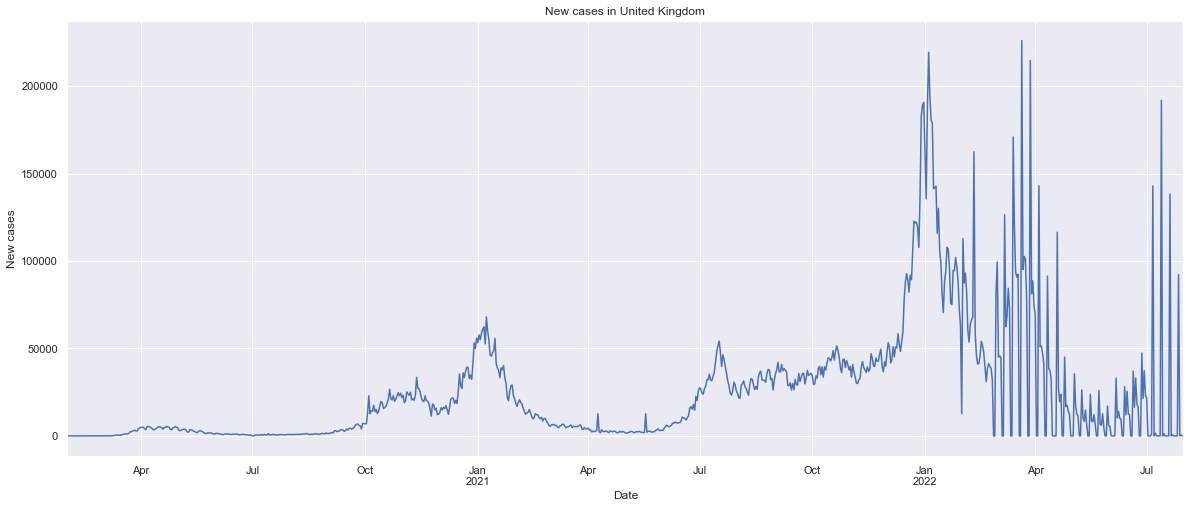

In [130]:
df[(df['location'] == 'United Kingdom')].plot(
x='date',
y='new_cases',
grid=True,
title="New cases in United Kingdom",
xlabel='Date',
ylabel='New cases',
legend=False)
plt.show()

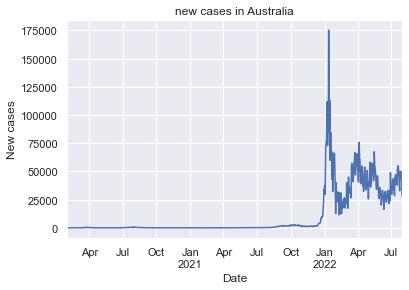

In [221]:
df[(df['location'] == 'Australia')].plot(
x='date',
y='new_cases',
grid=True,
title="new cases in Australia",
xlabel='Date',
ylabel='New cases',
legend=False)
plt.show()

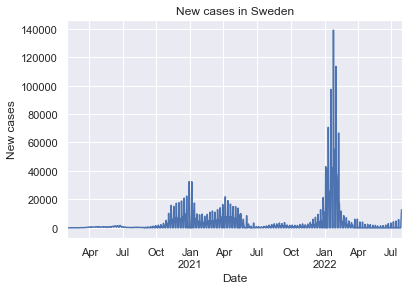

In [222]:
df[(df['location'] == 'Sweden')].plot(
x='date',
y='new_cases',
grid=True,
title="New cases in Sweden",
xlabel='Date',
ylabel='New cases',
legend=False)
plt.show()

### Comparative Analysis

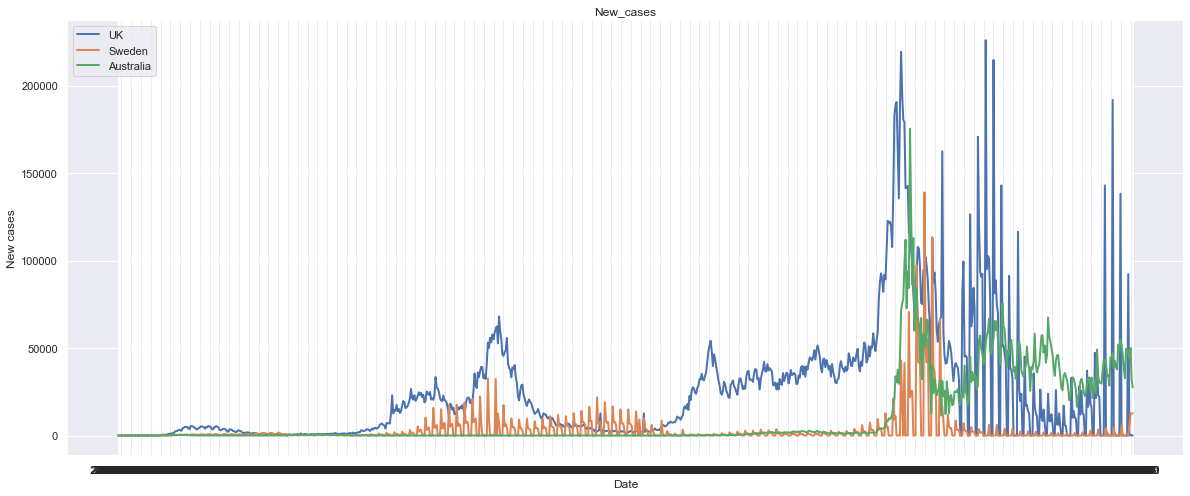

In [133]:
#Comparison analysis:
DateList  = df[(df['location'] == 'United Kingdom')]['date'].tolist()
new_UK_list  = df[(df['location'] == 'United Kingdom')]['new_cases'].tolist()
new_cases_Sweden_list  = df[(df['location'] == 'Sweden')]['new_cases'].tolist()
new_cases_Australia_list  = df[(df['location'] == 'Australia')]['new_cases'].tolist()

plt.plot(DateList, new_UK_list, label = 'UK', linewidth=2)
plt.plot(DateList, new_cases_Sweden_list, label = 'Sweden', linewidth=2)
plt.plot(DateList, new_cases_Australia_list, label = 'Australia', linewidth=2)

plt.xlabel('Date')
plt.ylabel('New cases')
plt.legend(loc='upper left')
plt.xticks(DateList)
plt.title('New_cases')
plt.show()

### Total cases

##### Total cases  in Sweden

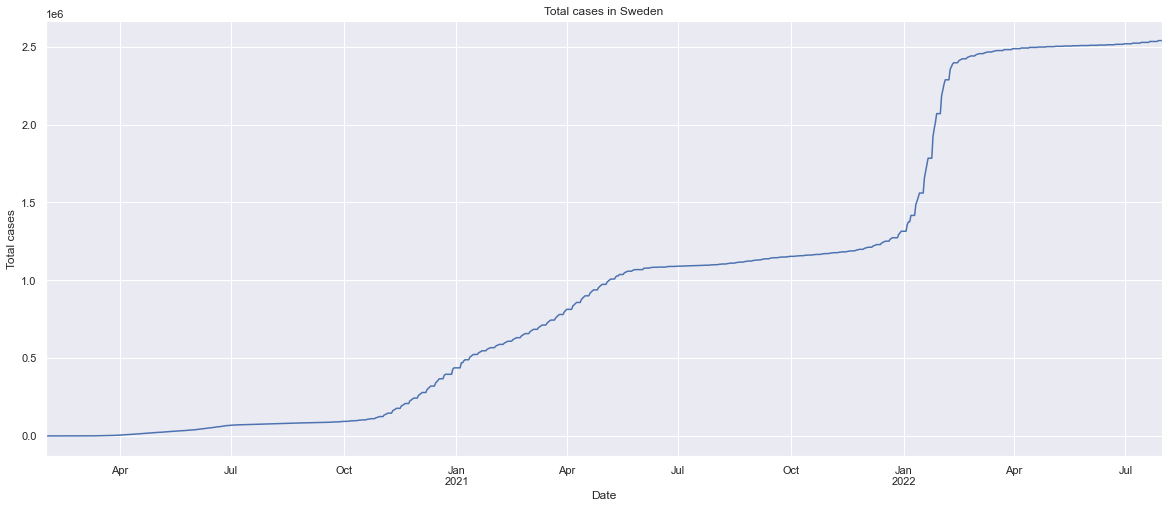

In [134]:
df[(df['location'] == 'Sweden')].plot(
x='date',
y='total_cases',
grid=True,
title="Total cases in Sweden",
xlabel='Date',
ylabel='Total cases',
legend=False)
plt.show()

##### Total cases  in Australia

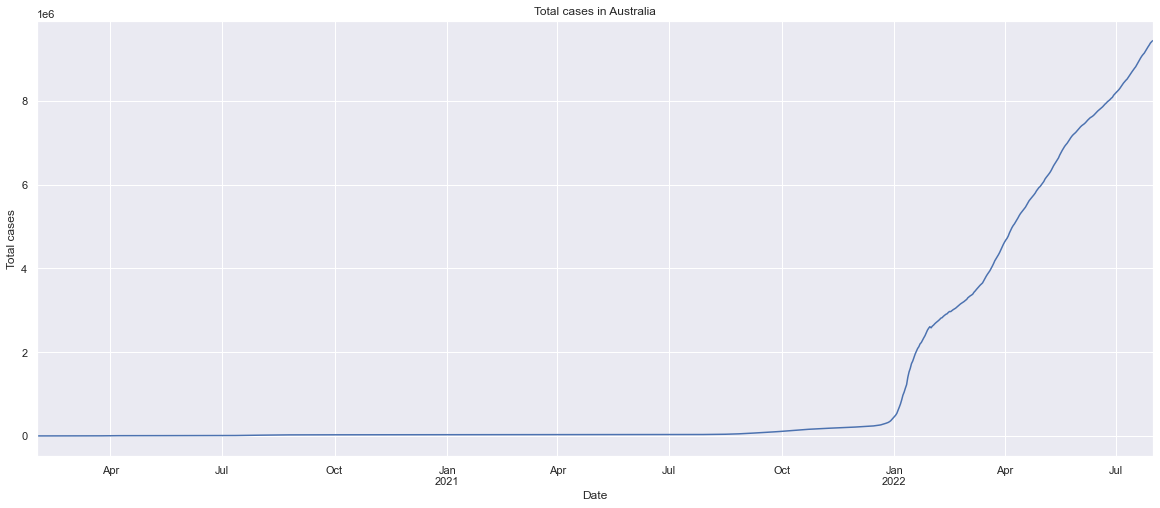

In [135]:
df[(df['location'] == 'Australia')].plot(
x='date',
y='total_cases',
grid=True,
title="Total cases in Australia",
xlabel='Date',
ylabel='Total cases',
legend=False)
plt.show()

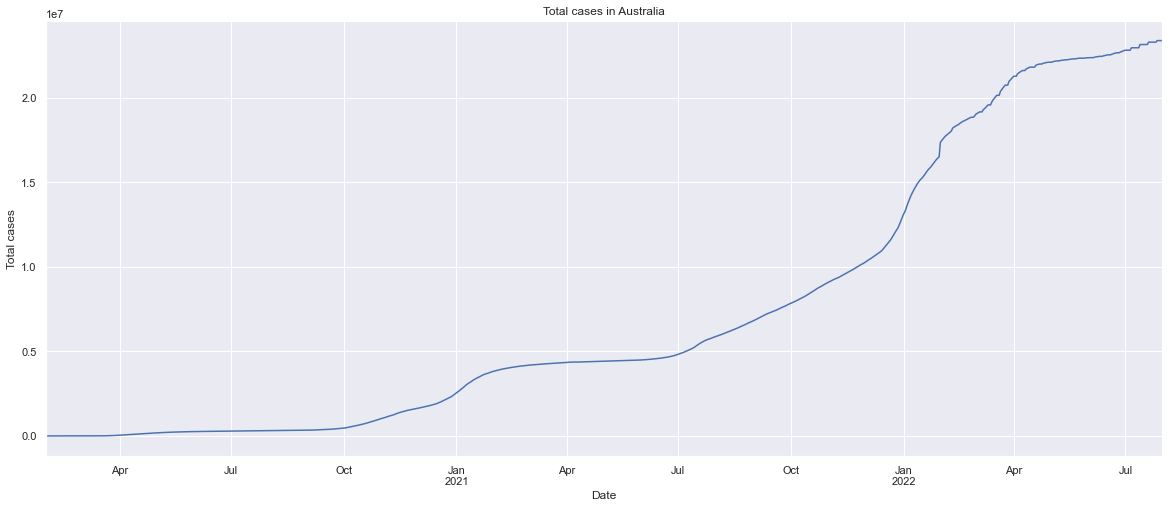

In [136]:
df[(df['location'] == 'United Kingdom')].plot(
x='date',
y='total_cases',
grid=True,
title="Total cases in Australia",
xlabel='Date',
ylabel='Total cases',
legend=False)
plt.show()

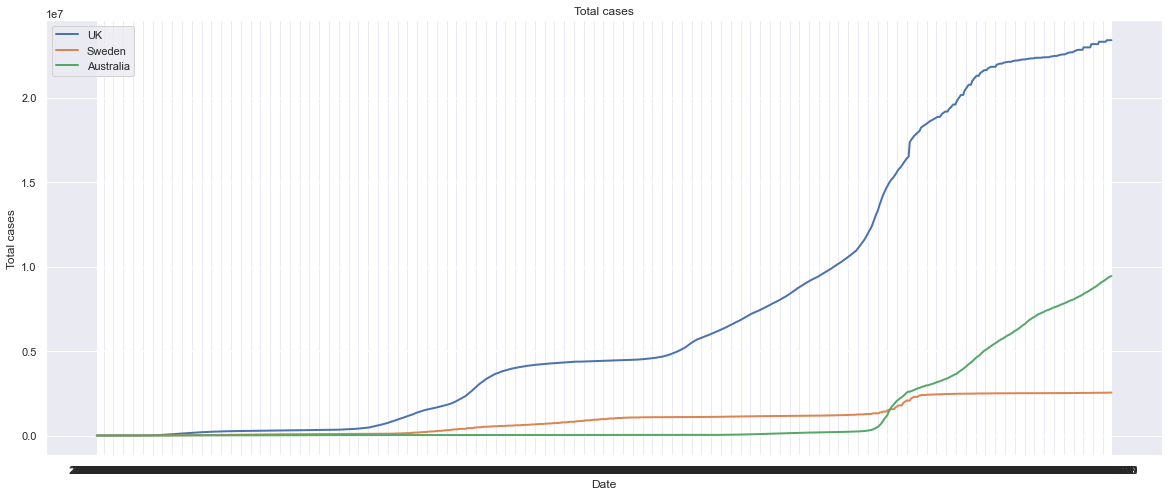

In [137]:
#Comparison analysis:
DateList  = df[(df['location'] == 'United Kingdom')]['date'].tolist()
total_cases_UK_list  = df[(df['location'] == 'United Kingdom')]['total_cases'].tolist()
total_cases_Sweden_list  = df[(df['location'] == 'Sweden')]['total_cases'].tolist()
total_cases_Australia_list  = df[(df['location'] == 'Australia')]['total_cases'].tolist()

plt.plot(DateList, total_cases_UK_list, label = 'UK', linewidth=2)
plt.plot(DateList, total_cases_Sweden_list, label = 'Sweden', linewidth=2)
plt.plot(DateList, total_cases_Australia_list, label = 'Australia', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Total cases')
plt.legend(loc='upper left')
plt.xticks(DateList)
plt.title('Total cases')
plt.show()

### Total deaths

##### Total deaths in united kingdom

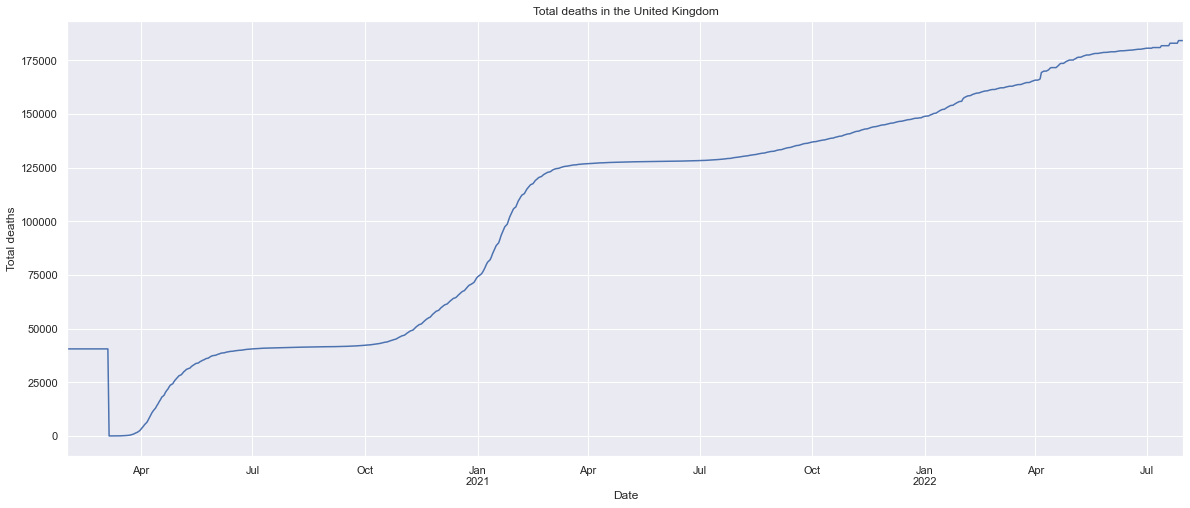

In [138]:
df[(df['location'] == 'United Kingdom')].plot(
x='date',
y='total_deaths',
grid=True,
title="Total deaths in the United Kingdom",
xlabel='Date',
ylabel='Total deaths',
legend=False)
plt.show()

##### Total death in Sweden

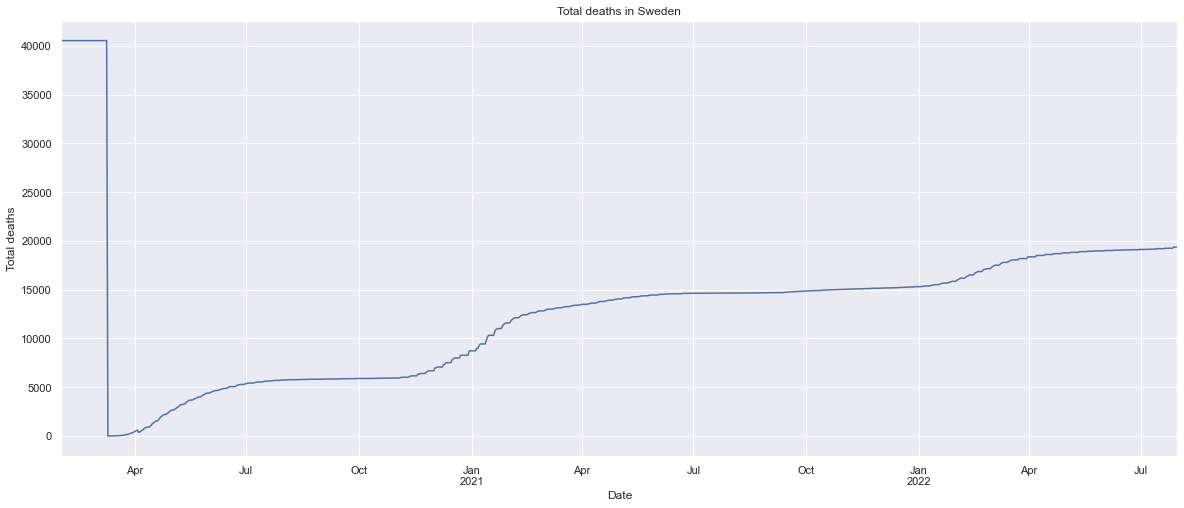

In [139]:
df[(df['location'] == 'Sweden')].plot(
x='date',
y='total_deaths',
grid=True,
title="Total deaths in Sweden",
xlabel='Date',
ylabel='Total deaths',
legend=False)
plt.show()

##### Total deaths in Australia

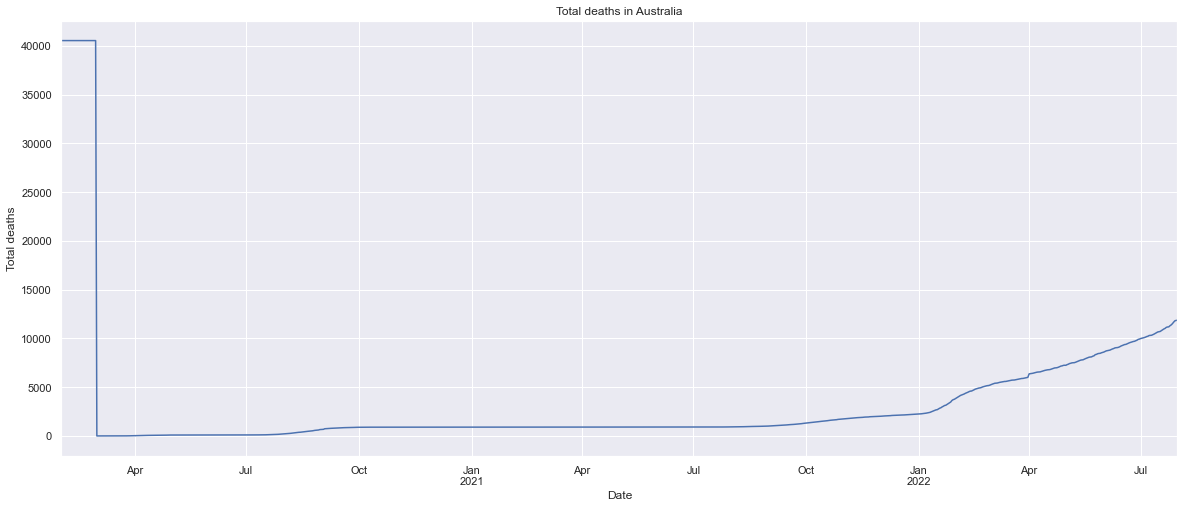

In [140]:
df[(df['location'] == 'Australia')].plot(
x='date',
y='total_deaths',
grid=True,
title="Total deaths in Australia",
xlabel='Date',
ylabel='Total deaths',
legend=False)
plt.show()

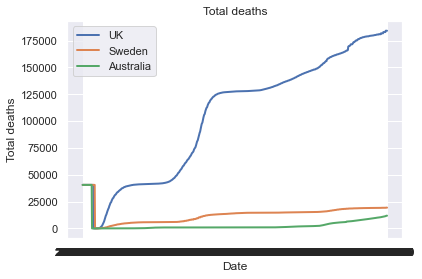

In [223]:
#Comparison analysis:
DateList  = df[(df['location'] == 'United Kingdom')]['date'].tolist()
total_cases_UK_list  = df[(df['location'] == 'United Kingdom')]['total_deaths'].tolist()
total_cases_Sweden_list  = df[(df['location'] == 'Sweden')]['total_deaths'].tolist()
total_cases_Australia_list  = df[(df['location'] == 'Australia')]['total_deaths'].tolist()

plt.plot(DateList, total_cases_UK_list, label = 'UK', linewidth=2)
plt.plot(DateList, total_cases_Sweden_list, label = 'Sweden', linewidth=2)
plt.plot(DateList, total_cases_Australia_list, label = 'Australia', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Total deaths')
plt.legend(loc='upper left')
plt.xticks(DateList)
plt.title('Total deaths')
plt.show()

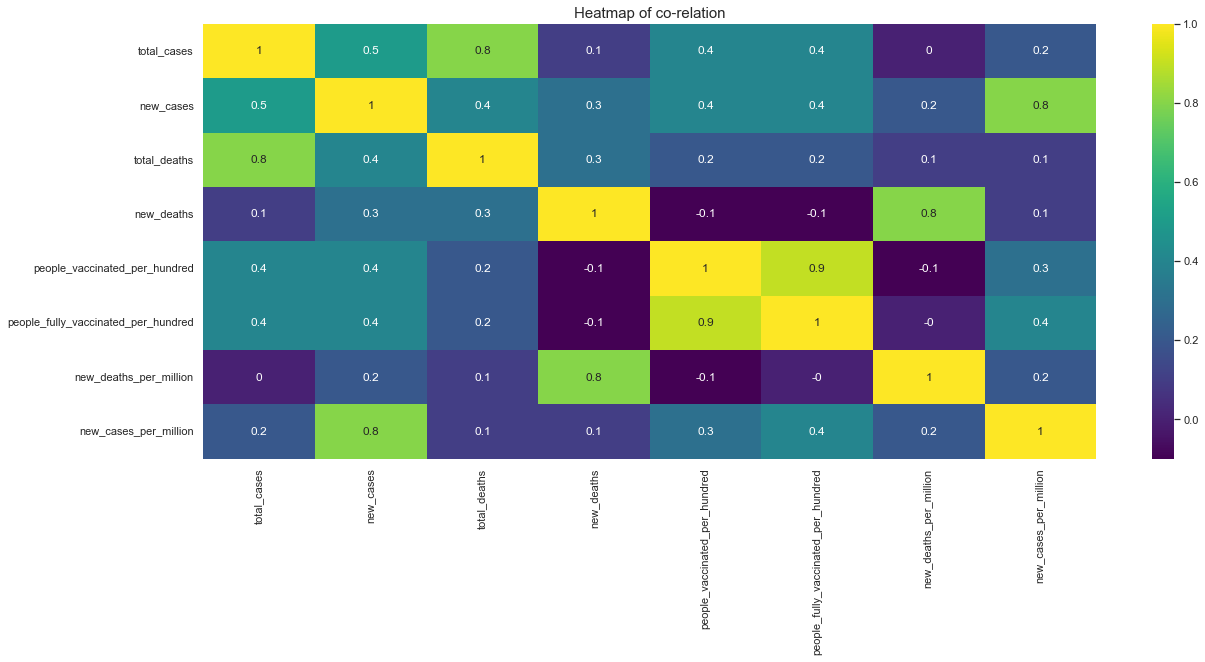

In [141]:
#Building heatmap to check correlations
sns.heatmap(round(df.corr(), 1),annot=True,cmap='viridis')
sns.set(rc={'figure.figsize':(20,8)})
plt.title('Heatmap of co-relation',fontsize=15)
plt.show()

## Time Series Analysis for new cases

In [214]:
df = pd.read_csv('clean_data.csv')
df.date = pd.to_datetime(df['date'])
df=df[df['date']>'2020-02-01']
df['month'] =df.date.dt.strftime('%b')
df['new_case_moving_average']=df['new_cases'].rolling(14).mean()
df['new_death_moving_average']=df['new_deaths'].rolling(14).mean()
uk_data = df[(df['location'] == 'United Kingdom')]
sw_data = df[(df['location'] == 'Sweden')]
Au_data=df[(df['location'] == 'Australia')]

df

location       date  total_cases  new_cases   total_deaths  \
1          Australia 2020-02-02         12.0        0.0   40539.314675   
2          Australia 2020-02-03         12.0        0.0   40539.314675   
3          Australia 2020-02-04         13.0        1.0   40539.314675   
4          Australia 2020-02-05         13.0        0.0   40539.314675   
5          Australia 2020-02-06         14.0        1.0   40539.314675   
...              ...        ...          ...        ...            ...   
2731  United Kingdom 2022-07-27   23391944.0    92237.0  184139.000000   
2732  United Kingdom 2022-07-28   23391944.0        0.0  184139.000000   
2733  United Kingdom 2022-07-29   23392406.0      462.0  184140.000000   
2734  United Kingdom 2022-07-30   23392406.0        0.0  184140.000000   
2735  United Kingdom 2022-07-31   23392406.0        0.0  184140.000000   

       new_deaths  people_vaccinated_per_hundred  \
1       81.003811                      60.419818   
2       81.003811                      60.419818   
3       81.003811                      60.419818   
4       81.003811                      60.419818   
5       81.003811                      60.419818   
...           ...                            ...   
2731  1226.000000                      79.830000   
2732     0.000000                      60.419818   
2733     1.000000                      60.419818   
2734     0.000000                      60.419818   
2735     0.000000                      60.419818   

      people_fully_vaccinated_per_hundred  new_deaths_per_million  \
1                               50.674232                1.913316   
2                               50.674232                1.913316   
3                               50.674232                1.913316   
4                               50.674232                1.913316   
5                               50.674232                1.913316   
...                                   ...                     ...   
2731                            75.030000               18.222000   
2732                            50.674232                0.000000   
2733                            50.674232                0.015000   
2734                            50.674232                0.000000   
2735                            50.674232                0.000000   

      new_cases_per_million month  new_case_moving_average  \
1                     0.000   Feb                      NaN   
2                     0.000   Feb                      NaN   
3                     0.039   Feb                      NaN   
4                     0.000   Feb                      NaN   
5                     0.039   Feb                      NaN   
...                     ...   ...                      ...   
2731               1370.921   Jul             16608.428571   
2732                  0.000   Jul             16608.428571   
2733                  6.867   Jul             16546.428571   
2734                  0.000   Jul             16546.428571   
2735                  0.000   Jul             16546.428571   

      new_death_moving_average  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
5                          NaN  
...                        ...  
2731                169.857143  
2732                169.857143  
2733                169.928571  
2734                169.928571  
2735                169.928571  

[2733 rows x 13 columns]

### Comparing seasonality across the different countries

In [194]:
def show_seasonality(data,country):
  fig, axes = plt.subplots(1,2,figsize=(20,7), dpi= 80)
  sns.boxplot(x=data.month, y=data['new_cases'], data=data,ax=axes[0])
  sns.boxplot(x=data.month, y=data['new_deaths'], data=data)
  axes[0].set_title(f'{country} new_case seasonality', fontsize=18); 
  axes[1].set_title(f'{country} new death_number seasonality', fontsize=18)

  plt.show()

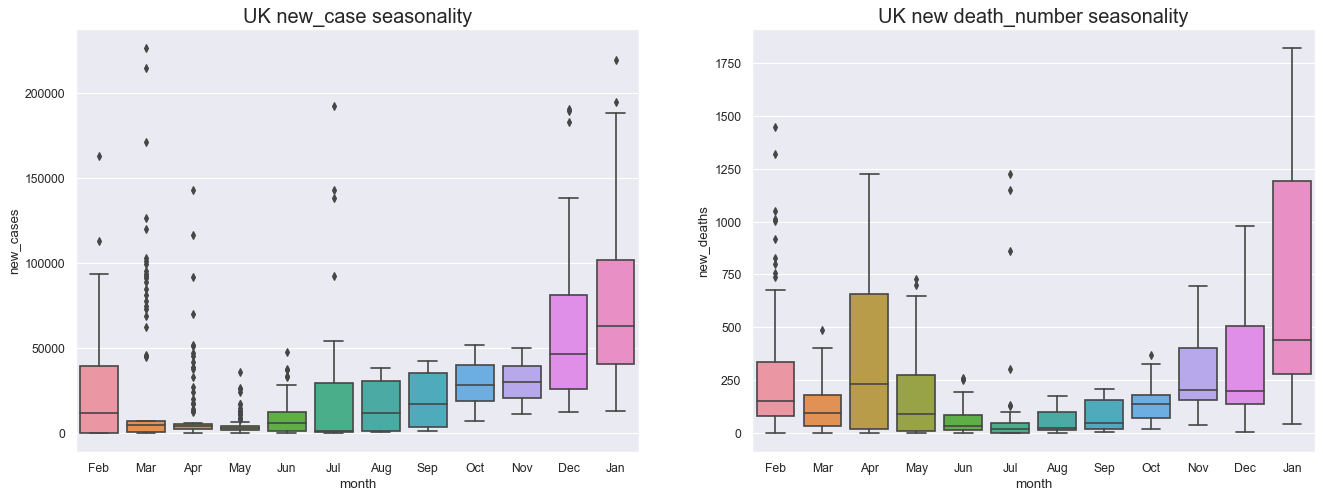

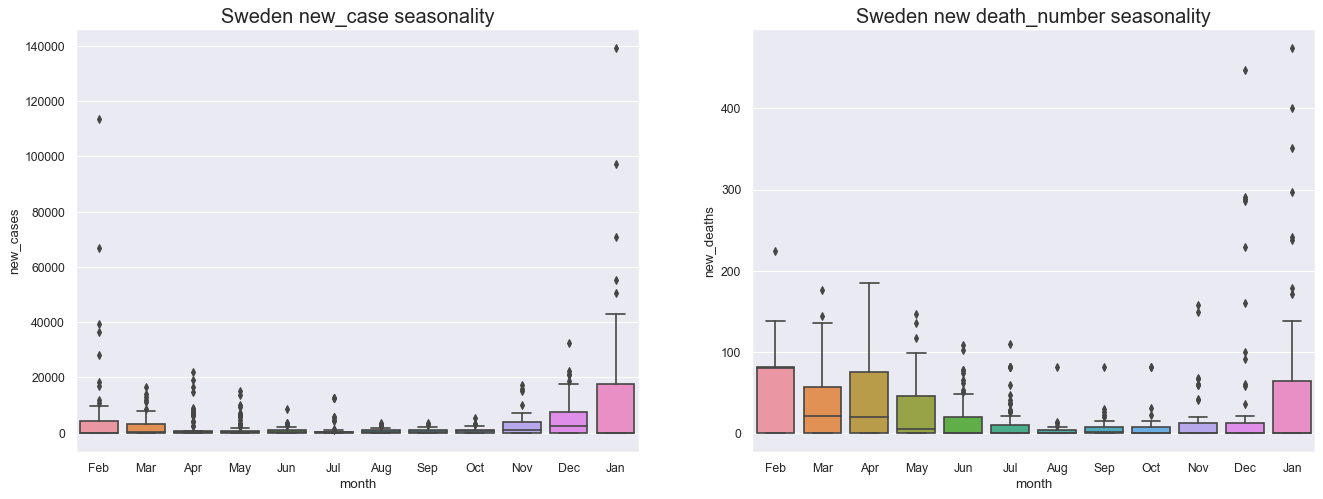

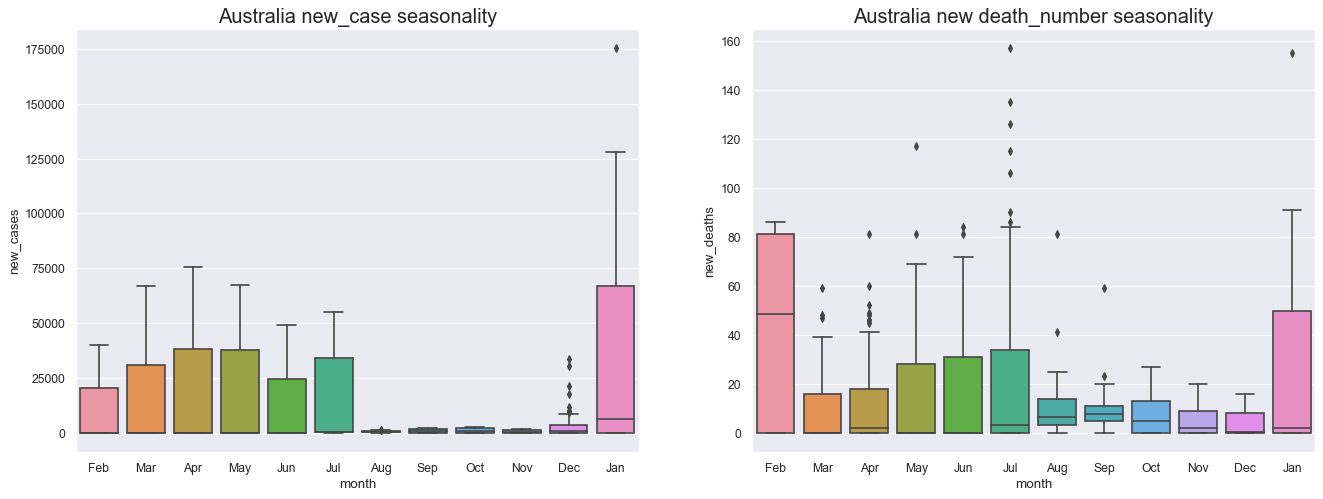

In [195]:
show_seasonality(uk_data,'UK')

show_seasonality(sw_data,'Sweden')

show_seasonality(Au_data,'Australia')

### Moving average analysis
Uk situation analysis

Moving average analysis please refer to: https://en.wikipedia.org/wiki/Moving-average_model

we would like to using moving average analysis to identify the the growth situation of covid

As covid identification was influence by the window period and people filling testing

Based on the COVID 19-SYMPTOM TIME LINES: the syptom normally coming in 5 days at 10 days and the window period normal 14 days.Therefore I would like to build the average moving of the new cases based above information

To identify fluctuations, we build 5 days moving average/ 10days moving average/ 14 days moving averages

In [201]:
from IPython.core.display import display_svg
def move_average_plot_test(data,country):
    
    df=data[['date','total_cases','new_cases']].copy()
         
    df.set_index('date', inplace=True)
    df['5 days Moving_Average new cases'] = 0
    df['5 days Moving_Average new cases'] = df['new_cases'].rolling(5).mean()
    df['10 days Moving_Average new cases'] = 0
    df['10 days Moving_Average new cases'] = df['new_cases'].rolling(10).mean()
    df['14 days Moving_Average new cases'] = 0
    df['14 days Moving_Average new cases'] = df['new_cases'].rolling(14).mean()
  
    #Plot new cases, new deaths and people vaccinated 
    df[['new_cases', '5 days Moving_Average new cases']].plot(figsize = (20, 5), alpha = 0.5)
    plt.title(f'5 days moving average in {country}')

    df[['new_cases', '10 days Moving_Average new cases']].plot(figsize = (20,5), alpha = 0.5)
    plt.title(f' 10 days moving average in {country}')

    df[['new_cases', '14 days Moving_Average new cases']].plot(figsize = (20, 5), alpha = 0.5)
    plt.title(f' 14 days moving average in {country}')
    #Return the dataframe processed
    return df

total_cases  new_cases  5 days Moving_Average new cases  \
date                                                                  
2020-02-02          2.0        0.0                              NaN   
2020-02-03          8.0        6.0                              NaN   
2020-02-04          8.0        0.0                              NaN   
2020-02-05          9.0        1.0                              NaN   
2020-02-06          9.0        0.0                              1.4   
...                 ...        ...                              ...   
2022-07-27   23391944.0    92237.0                          18447.4   
2022-07-28   23391944.0        0.0                          18447.4   
2022-07-29   23392406.0      462.0                          18539.8   
2022-07-30   23392406.0        0.0                          18539.8   
2022-07-31   23392406.0        0.0                          18539.8   

            10 days Moving_Average new cases  14 days Moving_Average new cases  
date                                                                            
2020-02-02                               NaN                               NaN  
2020-02-03                               NaN                               NaN  
2020-02-04                               NaN                               NaN  
2020-02-05                               NaN                               NaN  
2020-02-06                               NaN                               NaN  
...                                      ...                               ...  
2022-07-27                           23118.8                      16608.428571  
2022-07-28                           23118.8                      16608.428571  
2022-07-29                           23165.0                      16546.428571  
2022-07-30                            9343.7                      16546.428571  
2022-07-31                            9343.7                      16546.428571  

[911 rows x 5 columns]

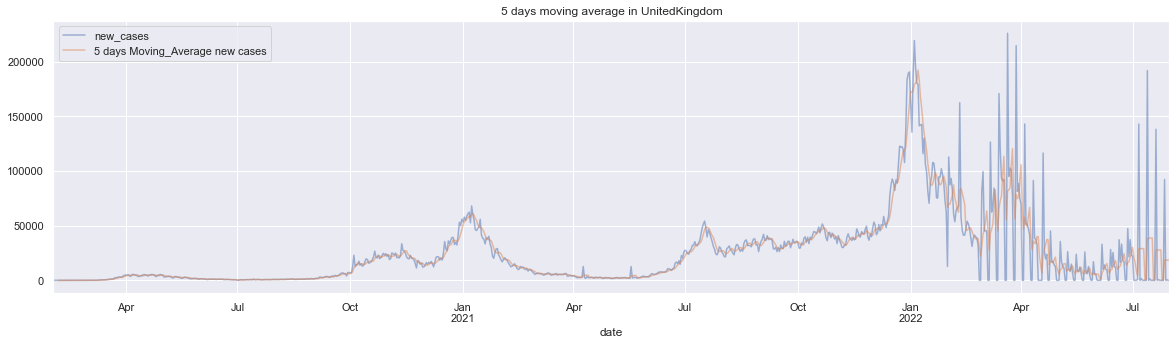

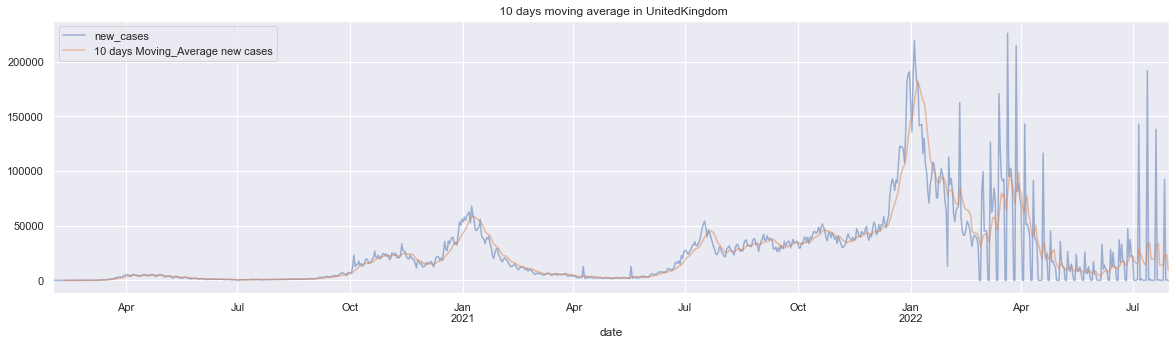

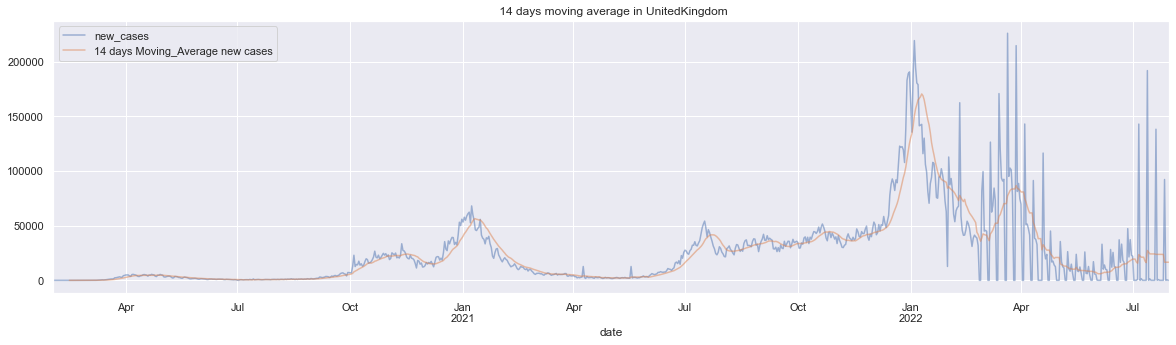

In [197]:
move_average_plot_test(uk_data,'UnitedKingdom')

total_cases  new_cases  5 days Moving_Average new cases  \
date                                                                  
2020-02-02          1.0       0.00                              NaN   
2020-02-03          1.0       0.00                              NaN   
2020-02-04          1.0       0.00                              NaN   
2020-02-05          1.0       0.00                              NaN   
2020-02-06          1.0       0.00                             0.00   
...                 ...        ...                              ...   
2022-07-27    2533978.0       0.00                             0.00   
2022-07-28    2539715.0    5737.00                          1147.40   
2022-07-29    2539715.0   12680.35                          3683.47   
2022-07-30    2539715.0   12680.35                          6219.54   
2022-07-31    2539715.0   12680.35                          8755.61   

            10 days Moving_Average new cases  14 days Moving_Average new cases  
date                                                                            
2020-02-02                               NaN                               NaN  
2020-02-03                               NaN                               NaN  
2020-02-04                               NaN                               NaN  
2020-02-05                               NaN                               NaN  
2020-02-06                               NaN                               NaN  
...                                      ...                               ...  
2022-07-27                           581.200                        755.285714  
2022-07-28                          1154.900                        824.928571  
2022-07-29                          2422.935                       1730.667857  
2022-07-30                          3690.970                       2636.407143  
2022-07-31                          4377.805                       3542.146429  

[911 rows x 5 columns]

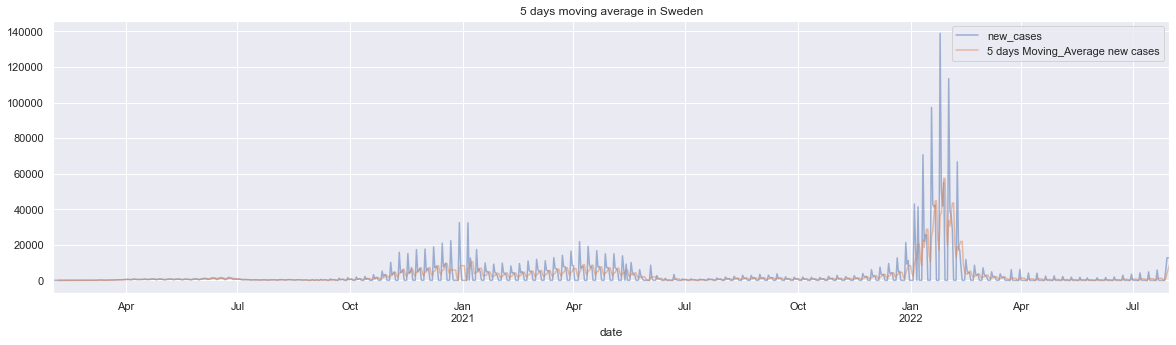

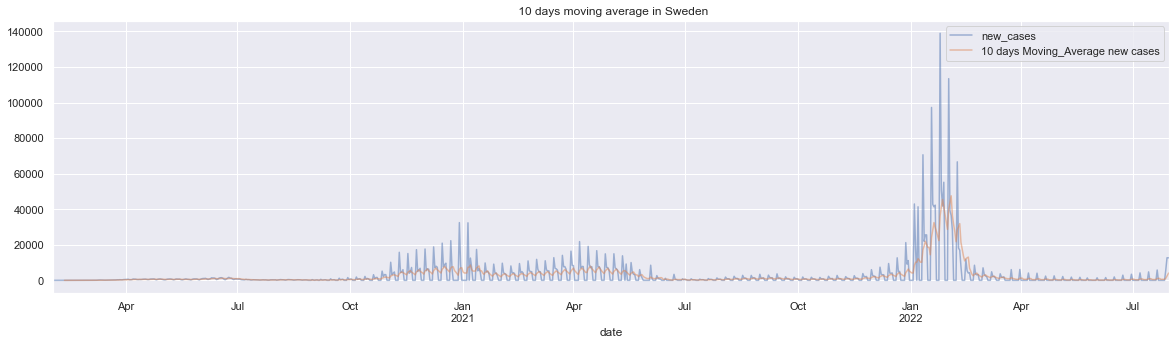

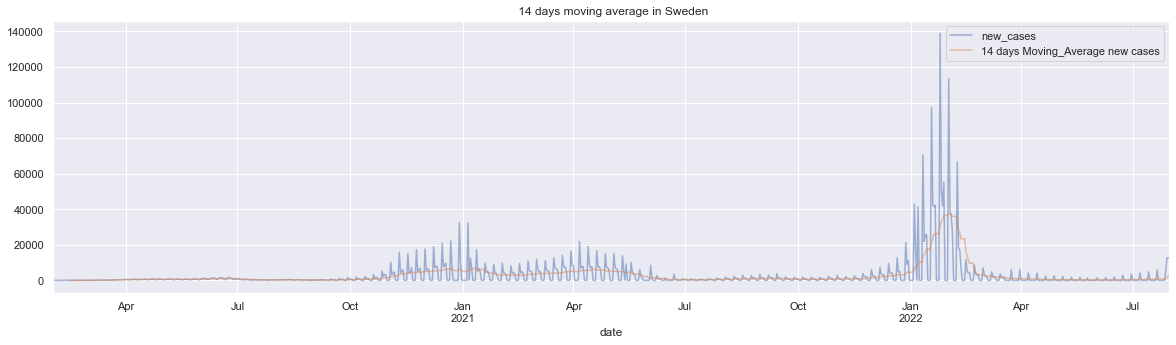

In [210]:
move_average_plot_test(sw_data,'Sweden')

total_cases  new_cases  5 days Moving_Average new cases  \
date                                                                  
2020-02-02         12.0        0.0                              NaN   
2020-02-03         12.0        0.0                              NaN   
2020-02-04         13.0        1.0                              NaN   
2020-02-05         13.0        0.0                              NaN   
2020-02-06         14.0        1.0                              0.4   
...                 ...        ...                              ...   
2022-07-27    9282271.0    47075.0                          43399.2   
2022-07-28    9326441.0    44170.0                          44624.0   
2022-07-29    9376483.0    50042.0                          48074.6   
2022-07-30    9408329.0    31846.0                          44518.6   
2022-07-31    9435839.0    27510.0                          40128.6   

            10 days Moving_Average new cases  14 days Moving_Average new cases  
date                                                                            
2020-02-02                               NaN                               NaN  
2020-02-03                               NaN                               NaN  
2020-02-04                               NaN                               NaN  
2020-02-05                               NaN                               NaN  
2020-02-06                               NaN                               NaN  
...                                      ...                               ...  
2022-07-27                           47099.7                      44942.142857  
2022-07-28                           46319.4                      45327.928571  
2022-07-29                           46433.4                      45850.714286  
2022-07-30                           44119.1                      45345.857143  
2022-07-31                           41687.4                      44611.785714  

[911 rows x 5 columns]

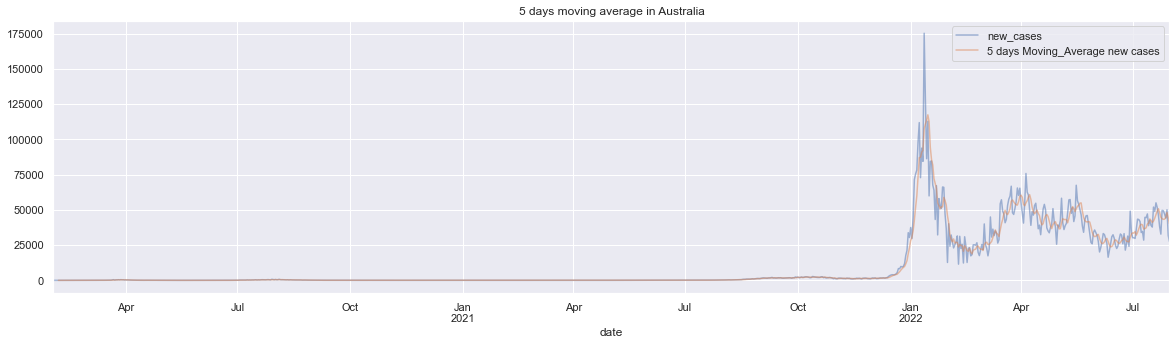

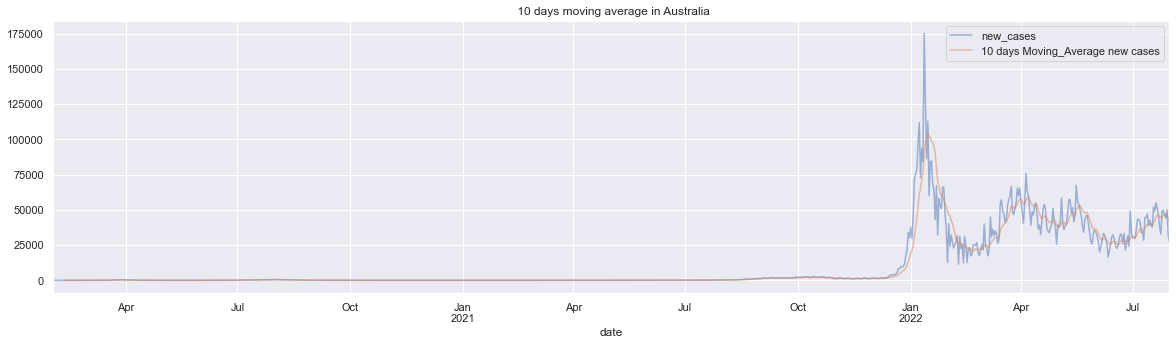

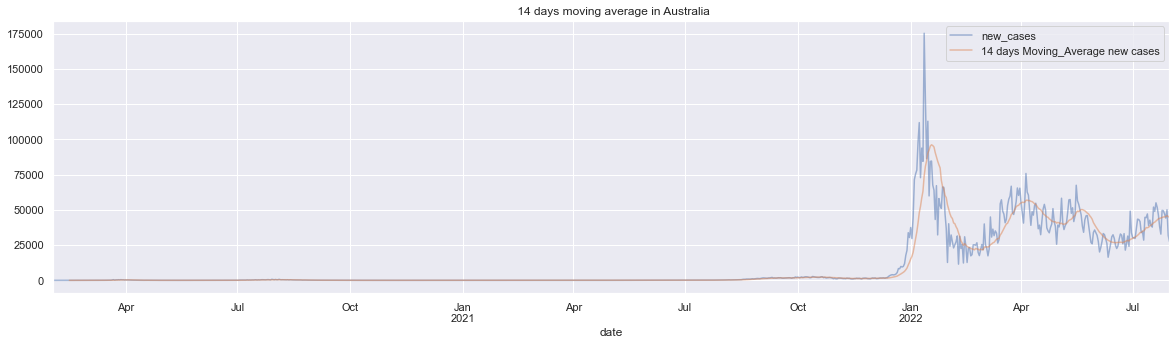

In [211]:
move_average_plot_test(Au_data,'Australia')

In [217]:
def move_average_plot(data,country):
    
    df=data[['date','total_cases','new_cases',"new_deaths"]].copy()
         
    # df.set_index('date', inplace=True)
    df['14 days Moving_Average new cases'] = 0
    df['14 days Moving_Average new cases'] = df['new_cases'].rolling(14).mean()
    df['14 days Moving_Average new deaths'] = 0
    df['14 days Moving_Average new deaths'] = df['new_deaths'].rolling(14).mean()
  
    #Plot new cases, new deaths and people vaccinated 

    font1 = {'family':'serif','color':'blue','size':30}
    fig, ax = plt.subplots(figsize=(20, 5))
      # make a plot
    ax.plot(df.date,
              df['14 days Moving_Average new cases'],
              color="red", 
              marker="o")
      # set x-axis label
    ax.set_xlabel("date", fontsize = 12)
      # set y-axis label
    ax.set_ylabel("14 days Moving_Average new cases",
                    color="red",
                    fontsize=14)
    
    ax2=ax.twinx()
# make a plot with different y-axis using second axis object
   
    ax2.plot(df.date, df["14 days Moving_Average new deaths"],color="blue",marker="o")
    ax2.set_ylabel("14 days Moving_Average new deaths",color="blue",fontsize=12)
    plt.title(f' 14 days moving average new deaths VS 14 days moving average new cases in {country}')
    plt.show()






    # df[['14 days Moving_Average new deaths', '14 days Moving_Average new cases']].plot(figsize = (20, 5), alpha = 0.5)
    # plt.title(f'14 days moving average of new cases an deaths in {country}',fontdict = font1)
    #Return the dataframe processed
    return df

In [218]:
def death_new_newcase_cor (dataset,Country):
    # before vaccine was developed
     stageOne= dataset['date'] <= "2021-01-05"
     stageOnedf=dataset[stageOne]
     return stageOnedf

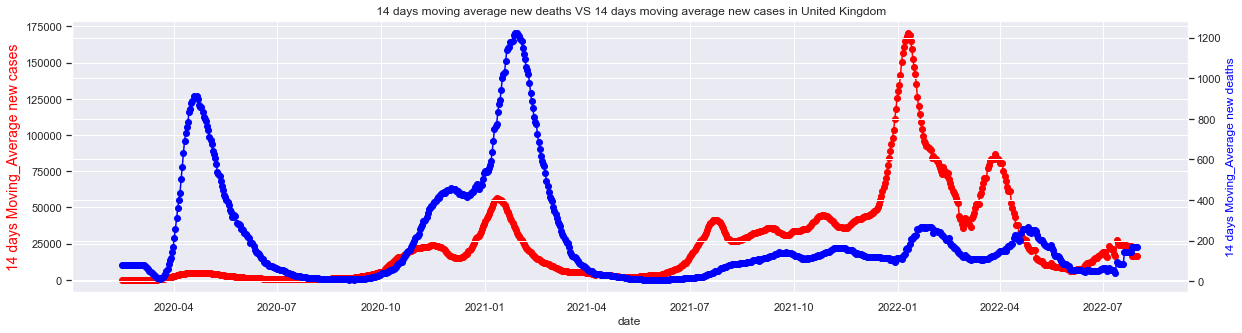

date  total_cases  new_cases  new_deaths  \
1825 2020-02-02          2.0        0.0   81.003811   
1826 2020-02-03          8.0        6.0   81.003811   
1827 2020-02-04          8.0        0.0   81.003811   
1828 2020-02-05          9.0        1.0   81.003811   
1829 2020-02-06          9.0        0.0   81.003811   
...         ...          ...        ...         ...   
2159 2021-01-01    2545102.0    53312.0  614.000000   
2160 2021-01-02    2602850.0    57748.0  447.000000   
2161 2021-01-03    2657861.0    55011.0  454.000000   
2162 2021-01-04    2716662.0    58801.0  407.000000   
2163 2021-01-05    2777606.0    60944.0  874.000000   

      14 days Moving_Average new cases  14 days Moving_Average new deaths  
1825                               NaN                                NaN  
1826                               NaN                                NaN  
1827                               NaN                                NaN  
1828                               NaN                                NaN  
1829                               NaN                                NaN  
...                                ...                                ...  
2159                      40402.071429                         542.428571  
2160                      42587.500000                         536.142857  
2161                      43941.642857                         545.071429  
2162                      45755.857143                         558.785714  
2163                      47471.928571                         571.857143  

[339 rows x 6 columns]

In [219]:
uk_data_moveAverage= move_average_plot(uk_data,'United Kingdom')

death_new_newcase_cor(uk_data_moveAverage,"United Kingdom")

In [220]:
uk_data_moveAverage

date  total_cases  new_cases   new_deaths  \
1825 2020-02-02          2.0        0.0    81.003811   
1826 2020-02-03          8.0        6.0    81.003811   
1827 2020-02-04          8.0        0.0    81.003811   
1828 2020-02-05          9.0        1.0    81.003811   
1829 2020-02-06          9.0        0.0    81.003811   
...         ...          ...        ...          ...   
2731 2022-07-27   23391944.0    92237.0  1226.000000   
2732 2022-07-28   23391944.0        0.0     0.000000   
2733 2022-07-29   23392406.0      462.0     1.000000   
2734 2022-07-30   23392406.0        0.0     0.000000   
2735 2022-07-31   23392406.0        0.0     0.000000   

      14 days Moving_Average new cases  14 days Moving_Average new deaths  
1825                               NaN                                NaN  
1826                               NaN                                NaN  
1827                               NaN                                NaN  
1828                               NaN                                NaN  
1829                               NaN                                NaN  
...                                ...                                ...  
2731                      16608.428571                         169.857143  
2732                      16608.428571                         169.857143  
2733                      16546.428571                         169.928571  
2734                      16546.428571                         169.928571  
2735                      16546.428571                         169.928571  

[911 rows x 6 columns]

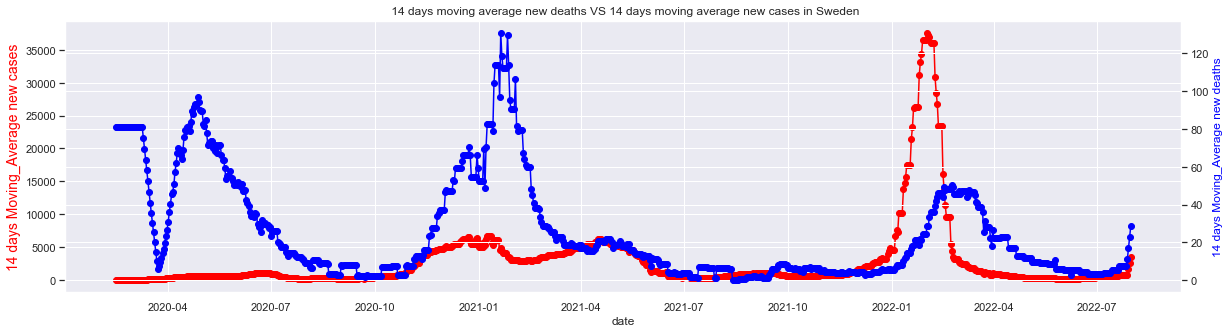

date  total_cases  new_cases  new_deaths  \
913  2020-02-02          1.0        0.0   81.003811   
914  2020-02-03          1.0        0.0   81.003811   
915  2020-02-04          1.0        0.0   81.003811   
916  2020-02-05          1.0        0.0   81.003811   
917  2020-02-06          1.0        0.0   81.003811   
...         ...          ...        ...         ...   
1247 2021-01-01     437379.0        0.0    0.000000   
1248 2021-01-02     437379.0        0.0    0.000000   
1249 2021-01-03     437379.0        0.0    0.000000   
1250 2021-01-04     437379.0        0.0    0.000000   
1251 2021-01-05     469748.0    32369.0  238.000000   

      14 days Moving_Average new cases  14 days Moving_Average new deaths  
913                                NaN                                NaN  
914                                NaN                                NaN  
915                                NaN                                NaN  
916                                NaN                                NaN  
917                                NaN                                NaN  
...                                ...                                ...  
1247                       5018.500000                          52.428571  
1248                       5018.500000                          52.428571  
1249                       5018.500000                          52.428571  
1250                       5018.500000                          52.428571  
1251                       5736.357143                          69.428571  

[339 rows x 6 columns]

In [208]:
sw_datamoveAverage=move_average_plot(sw_data,'Sweden')

death_new_newcase_cor(sw_datamoveAverage,"Sweden")

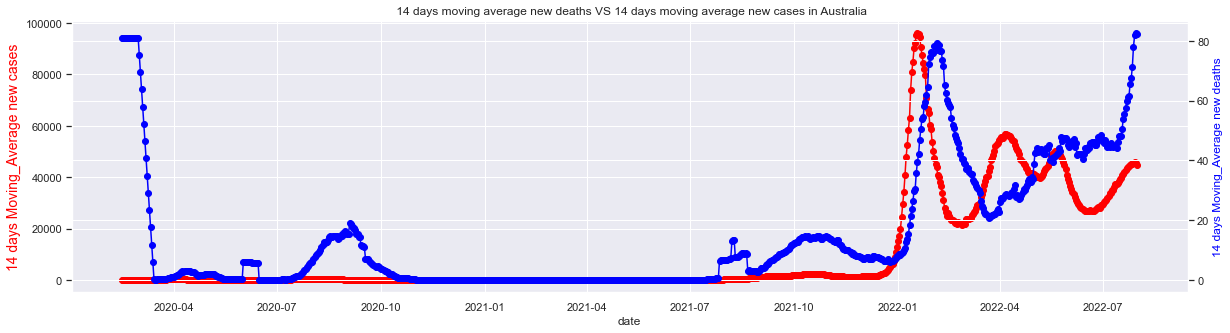

date  total_cases  new_cases  new_deaths  \
1   2020-02-02         12.0        0.0   81.003811   
2   2020-02-03         12.0        0.0   81.003811   
3   2020-02-04         13.0        1.0   81.003811   
4   2020-02-05         13.0        0.0   81.003811   
5   2020-02-06         14.0        1.0   81.003811   
..         ...          ...        ...         ...   
335 2021-01-01      28460.0       35.0    0.000000   
336 2021-01-02      28484.0       24.0    0.000000   
337 2021-01-03      28504.0       20.0    0.000000   
338 2021-01-04      28517.0       13.0    0.000000   
339 2021-01-05      28536.0       19.0    0.000000   

     14 days Moving_Average new cases  14 days Moving_Average new deaths  
1                                 NaN                                NaN  
2                                 NaN                                NaN  
3                                 NaN                                NaN  
4                                 NaN                                NaN  
5                                 NaN                                NaN  
..                                ...                                ...  
335                         23.857143                           0.071429  
336                         22.571429                           0.071429  
337                         21.857143                           0.071429  
338                         21.285714                           0.071429  
339                         21.357143                           0.071429  

[339 rows x 6 columns]

In [209]:
Au_datamoveAverage=move_average_plot(Au_data,'Australia')
death_new_newcase_cor(Au_datamoveAverage,"Australia")

## Analysing Covid restrictions

In [146]:
#Importing the covid restriction data:
restriction_df = pd.read_csv(r'covid-containment-and-health-index.csv')

#quick look at data:
restriction_df

Entity Code         Day  containment_index
0       Afghanistan  AFG  2020-01-01               0.00
1       Afghanistan  AFG  2020-01-02               0.00
2       Afghanistan  AFG  2020-01-03               0.00
3       Afghanistan  AFG  2020-01-04               0.00
4       Afghanistan  AFG  2020-01-05               0.00
...             ...  ...         ...                ...
167946     Zimbabwe  ZWE  2022-07-15              57.74
167947     Zimbabwe  ZWE  2022-07-16              57.74
167948     Zimbabwe  ZWE  2022-07-17              57.74
167949     Zimbabwe  ZWE  2022-07-18              57.74
167950     Zimbabwe  ZWE  2022-07-19              57.74

[167951 rows x 4 columns]

In [147]:
restriction_df.head(10)

Entity Code         Day  containment_index
0  Afghanistan  AFG  2020-01-01                0.0
1  Afghanistan  AFG  2020-01-02                0.0
2  Afghanistan  AFG  2020-01-03                0.0
3  Afghanistan  AFG  2020-01-04                0.0
4  Afghanistan  AFG  2020-01-05                0.0
5  Afghanistan  AFG  2020-01-06                0.0
6  Afghanistan  AFG  2020-01-07                0.0
7  Afghanistan  AFG  2020-01-08                0.0
8  Afghanistan  AFG  2020-01-09                0.0
9  Afghanistan  AFG  2020-01-10                0.0

### Cleaning data

In [152]:
#rename columns

restriction_df.rename(columns = {'Entity':'Country', 'containment_index':'restriction'}, inplace = True)

In [153]:
restriction_df.describe()

restriction
count  167951.000000
mean       49.566705
std        19.771183
min         0.000000
25%        38.910000
50%        52.380000
75%        63.760000
max        94.470000

In [154]:
#Filtering data for United Kingdom, Sweden, Australia:

restriction_data = restriction_df[(restriction_df['Country'] == 'United Kingdom')
                                  | (restriction_df['Country'] == 'Sweden') | (restriction_df['Country'] == 'Australia')]
restriction_data

Country Code         Day  restriction
6507         Australia  AUS  2020-01-01         0.00
6508         Australia  AUS  2020-01-02         0.00
6509         Australia  AUS  2020-01-03         0.00
6510         Australia  AUS  2020-01-04         0.00
6511         Australia  AUS  2020-01-05         0.00
...                ...  ...         ...          ...
159546  United Kingdom  GBR  2022-07-15        23.51
159547  United Kingdom  GBR  2022-07-16        23.51
159548  United Kingdom  GBR  2022-07-17        23.51
159549  United Kingdom  GBR  2022-07-18        23.51
159550  United Kingdom  GBR  2022-07-19        23.51

[2793 rows x 4 columns]

In [155]:
# getting missing values
restriction_data.isnull().sum()

Country        0
Code           0
Day            0
restriction    0
dtype: int64

In [156]:
#Time:
#All:
print(restriction_data['Day'].min())
print(restriction_data['Day'].max())

2020-01-01
2022-07-19


In [157]:
#Filtering data for period of time: 2020-02-01 - 2022-07-31
restriction_data = restriction_data[(restriction_data['Day']>= '2020-02-01') & (restriction_data['Day'] <='2022-07-31')]
restriction_data

Country Code         Day  restriction
6538         Australia  AUS  2020-02-01        18.45
6539         Australia  AUS  2020-02-02        18.45
6540         Australia  AUS  2020-02-03        22.02
6541         Australia  AUS  2020-02-04        22.02
6542         Australia  AUS  2020-02-05        22.02
...                ...  ...         ...          ...
159546  United Kingdom  GBR  2022-07-15        23.51
159547  United Kingdom  GBR  2022-07-16        23.51
159548  United Kingdom  GBR  2022-07-17        23.51
159549  United Kingdom  GBR  2022-07-18        23.51
159550  United Kingdom  GBR  2022-07-19        23.51

[2700 rows x 4 columns]

In [158]:
restriction_data.to_csv('data-containment.csv',index=None, header=True)

## Plotting Covid Restrictions Over Time

### United Kingdom

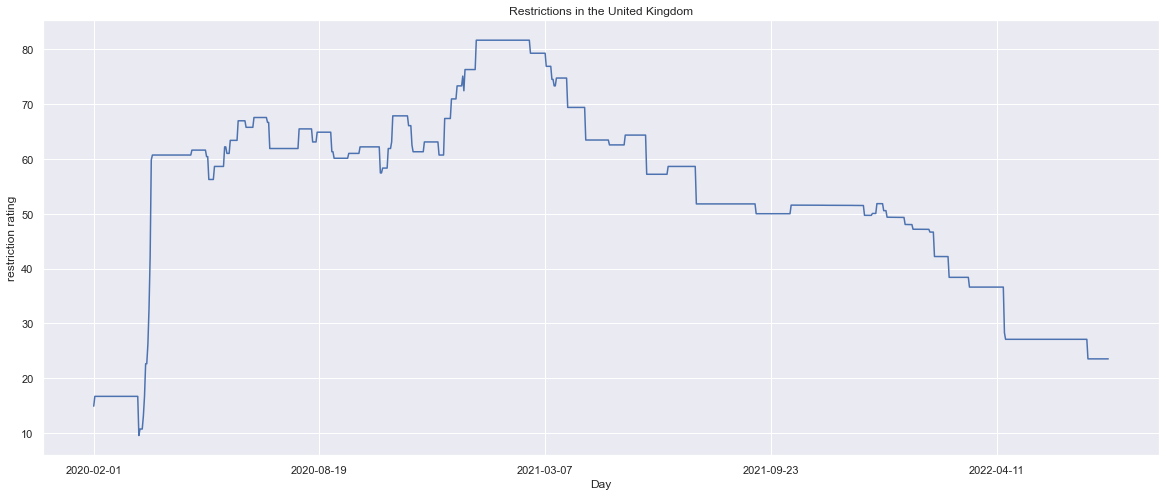

In [159]:
restriction_data[(restriction_data['Country'] == 'United Kingdom')].plot(
x='Day',
y='restriction',
grid=True,
title="Restrictions in the United Kingdom",
xlabel='Day',
ylabel='restriction rating',
legend=False)
plt.show()

### Sweden

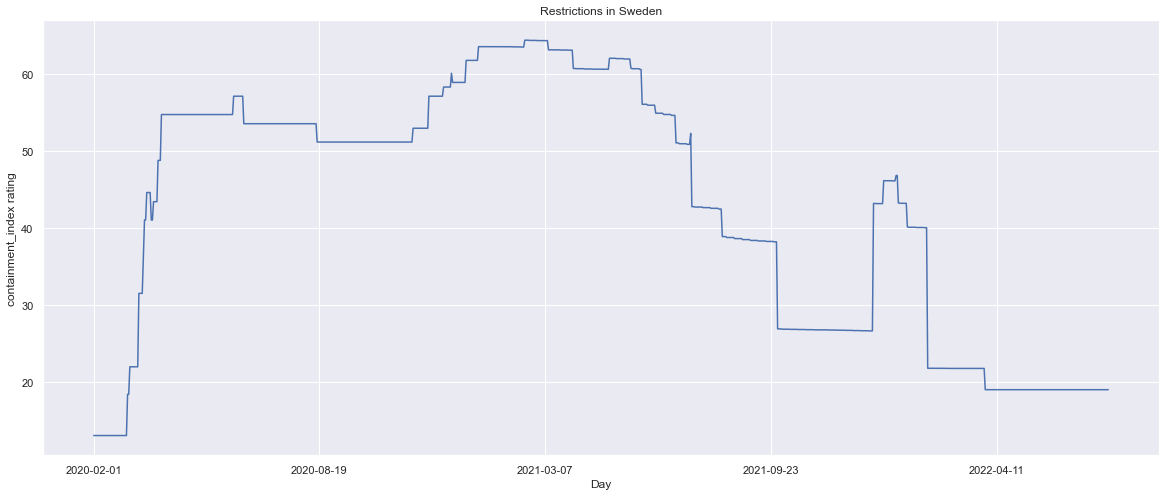

In [160]:
restriction_data[(restriction_data['Country'] == 'Sweden')].plot(
x='Day',
y='restriction',
grid=True,
title="Restrictions in Sweden",
xlabel='Day',
ylabel='containment_index rating',
legend=False)
plt.show()

### Australia

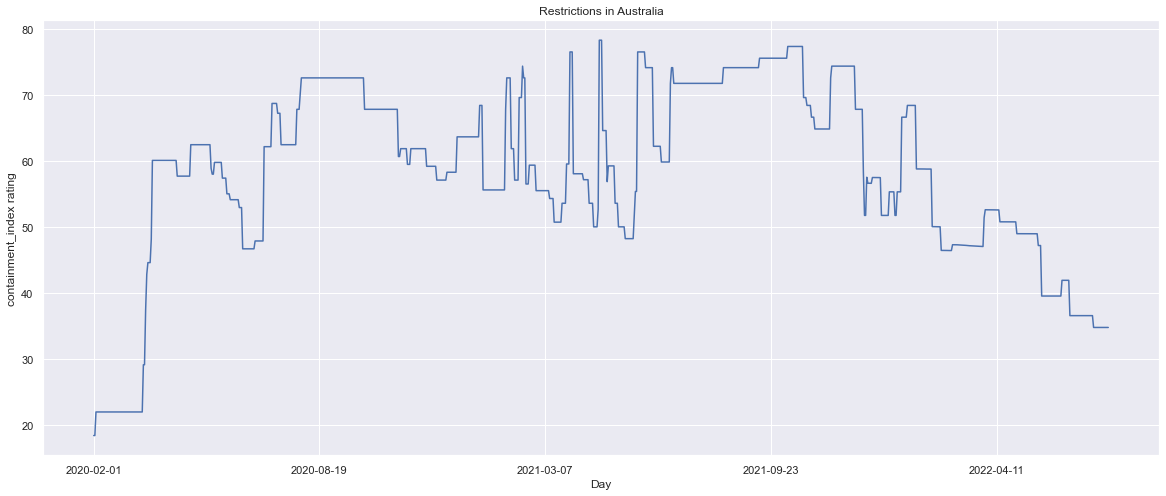

In [161]:
restriction_data[(restriction_data['Country'] == 'Australia')].plot(
x='Day',
y='restriction',
grid=True,
title="Restrictions in Australia",
xlabel='Day',
ylabel='containment_index rating',
legend=False)
plt.show()

### Comparison of all 3 countries

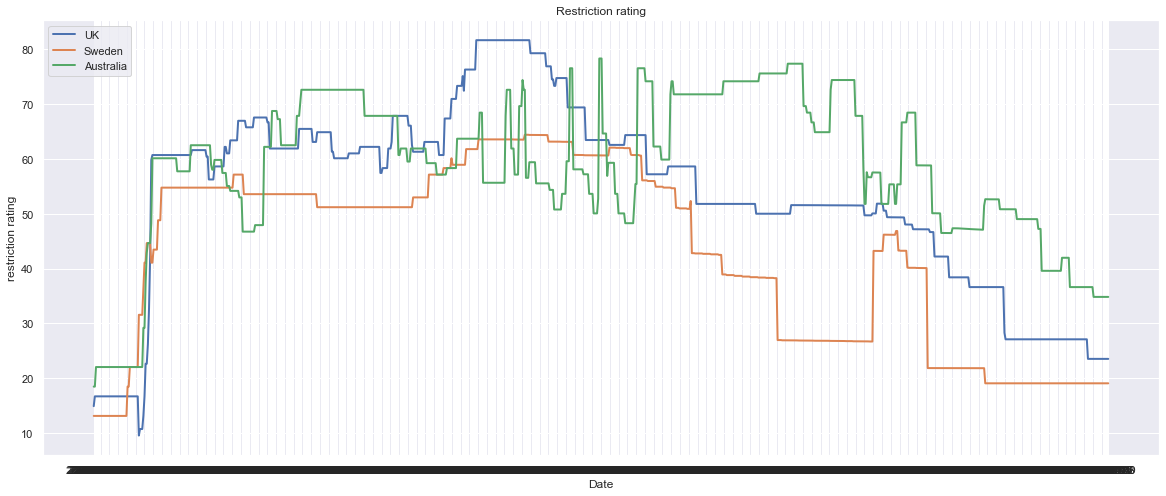

In [162]:
DateList  = restriction_data[(restriction_data['Country'] == 'United Kingdom')]['Day'].tolist()
restriction_UK_list  = restriction_data[(restriction_data['Country'] == 'United Kingdom')]['restriction'].tolist()
restriction_Sweden_list  = restriction_data[(restriction_data['Country'] == 'Sweden')]['restriction'].tolist()
restriction_Australia_list  = restriction_data[(restriction_data['Country'] == 'Australia')]['restriction'].tolist()

plt.plot(DateList, restriction_UK_list, label = 'UK', linewidth=2)
plt.plot(DateList, restriction_Sweden_list, label = 'Sweden', linewidth=2)
plt.plot(DateList, restriction_Australia_list, label = 'Australia', linewidth=2)

plt.xlabel('Date')
plt.ylabel('restriction rating')
plt.legend(loc='upper left')
plt.xticks(DateList)
plt.title('Restriction rating')
plt.show()

#### Importing clean version of the original dataset

In [163]:
df.to_csv('clean_data.csv',index=None, header=True)

In [164]:
df_new = df[['date','location','total_deaths']]
df_new.head()

date   location  total_deaths
10726 2020-02-01  Australia  40539.314675
10727 2020-02-02  Australia  40539.314675
10728 2020-02-03  Australia  40539.314675
10729 2020-02-04  Australia  40539.314675
10730 2020-02-05  Australia  40539.314675

#### Merging the dataset to show total deaths over time and restriction level over time

In [165]:
uk_df = df_new[(df_new['location'] == 'United Kingdom')]
df_uk = uk_df[['date', 'total_deaths']]
df_uk

date   total_deaths
193349 2020-02-01   40539.314675
193350 2020-02-02   40539.314675
193351 2020-02-03   40539.314675
193352 2020-02-04   40539.314675
193353 2020-02-05   40539.314675
...           ...            ...
194256 2022-07-27  184139.000000
194257 2022-07-28  184139.000000
194258 2022-07-29  184140.000000
194259 2022-07-30  184140.000000
194260 2022-07-31  184140.000000

[912 rows x 2 columns]

In [166]:
df_uk1 = df_uk.set_index('date')
df_uk1

total_deaths
date                     
2020-02-01   40539.314675
2020-02-02   40539.314675
2020-02-03   40539.314675
2020-02-04   40539.314675
2020-02-05   40539.314675
...                   ...
2022-07-27  184139.000000
2022-07-28  184139.000000
2022-07-29  184140.000000
2022-07-30  184140.000000
2022-07-31  184140.000000

[912 rows x 1 columns]

In [167]:
uk_data = restriction_data[(restriction_data['Country'] == 'United Kingdom')]
uk_new = uk_data[['Day','restriction']]
uk_new.head()

Day  restriction
158651  2020-02-01        14.88
158652  2020-02-02        16.67
158653  2020-02-03        16.67
158654  2020-02-04        16.67
158655  2020-02-05        16.67

In [168]:
transpose_uk = uk_new.transpose()
new_header = transpose_uk.iloc[0] #grab the first row for the header
new_df_uk = transpose_uk[1:] #take the data less the header row
new_df_uk.columns = new_header #set the header row as the df header

In [169]:
df_final = new_df_uk.transpose()
df_final.head()

restriction
Day                   
2020-02-01       14.88
2020-02-02       16.67
2020-02-03       16.67
2020-02-04       16.67
2020-02-05       16.67

In [170]:
df_uk = uk_df[['date', 'total_deaths']]
df_uk.head()

df_uk1 = df_uk.set_index('date')
df_uk1

# Aligning index
df_final['total_deaths'] = df_uk1.total_deaths
  
# removing Missing Values
df_final.dropna(inplace=True)
  
df_final.head(10)

restriction  total_deaths
Day                                 
2020-02-01       14.88  40539.314675
2020-02-02       16.67  40539.314675
2020-02-03       16.67  40539.314675
2020-02-04       16.67  40539.314675
2020-02-05       16.67  40539.314675
2020-02-06       16.67  40539.314675
2020-02-07       16.67  40539.314675
2020-02-08       16.67  40539.314675
2020-02-09       16.67  40539.314675
2020-02-10       16.67  40539.314675

## Showing the restriction levels over time plotted against total deaths

### United Kingdom

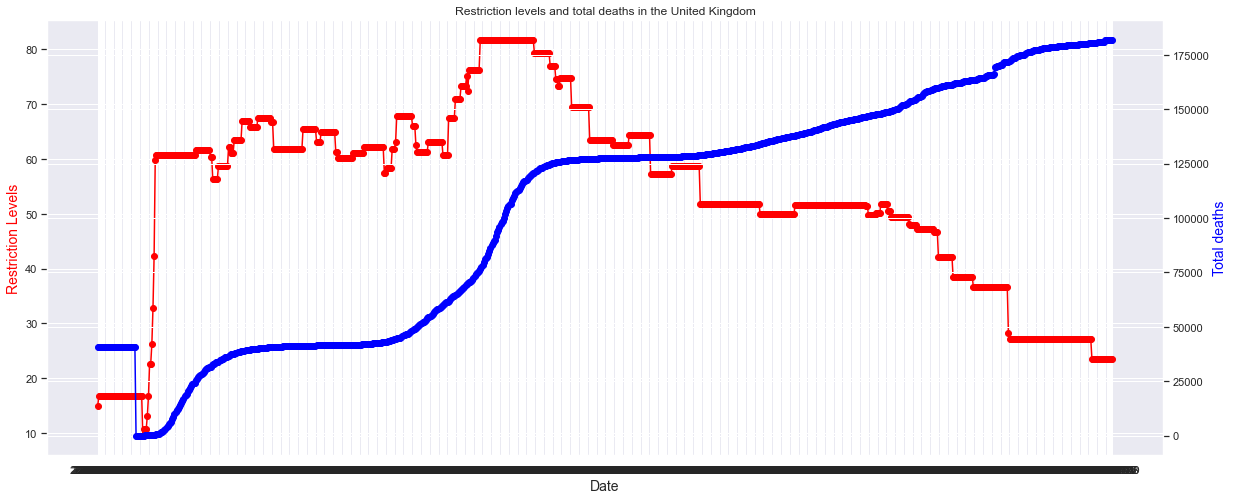

In [171]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_final["restriction"],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("Date", fontsize = 14)
# set y-axis label
ax.set_ylabel("Restriction Levels",
              color="red",
              fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_final["total_deaths"],color="blue",marker="o")
ax2.set_ylabel("Total deaths",color="blue",fontsize=14)
plt.title('Restriction levels and total deaths in the United Kingdom')
plt.show()


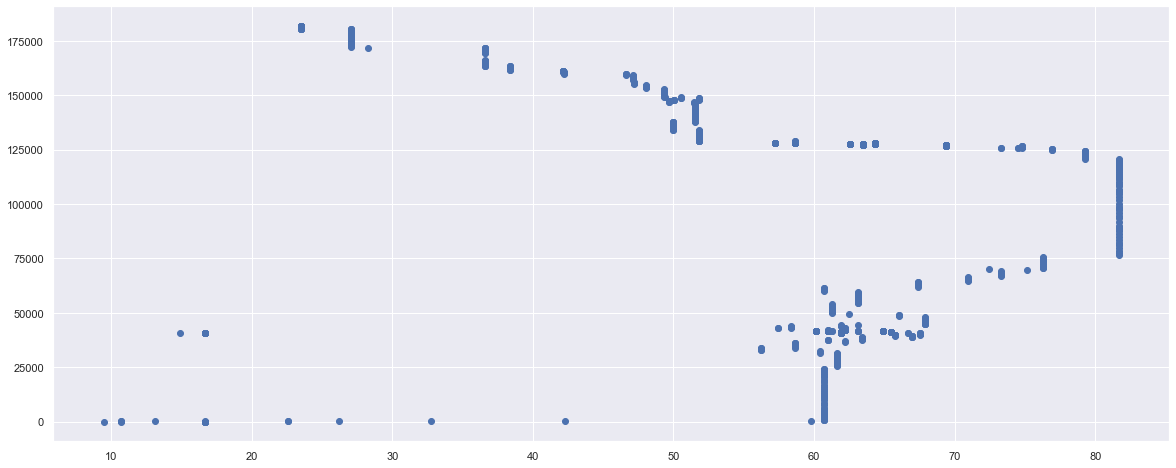

In [172]:
plt.scatter(df_final["restriction"], df_final["total_deaths"])

### Australia

In [173]:
df2 = pd.read_csv(r'clean_data.csv')
df2_new = df2[['date','location','total_deaths']]
df2_new.head()

date   location  total_deaths
0  2020-02-01  Australia  40539.314675
1  2020-02-02  Australia  40539.314675
2  2020-02-03  Australia  40539.314675
3  2020-02-04  Australia  40539.314675
4  2020-02-05  Australia  40539.314675

In [174]:
australia_df = df2_new[(df2_new['location'] == 'Australia')]
df_aus = australia_df[['date', 'total_deaths']]
df_aus.head()

date  total_deaths
0  2020-02-01  40539.314675
1  2020-02-02  40539.314675
2  2020-02-03  40539.314675
3  2020-02-04  40539.314675
4  2020-02-05  40539.314675

In [175]:
df_aus1 = df_aus.set_index('date')
df_aus1

total_deaths
date                    
2020-02-01  40539.314675
2020-02-02  40539.314675
2020-02-03  40539.314675
2020-02-04  40539.314675
2020-02-05  40539.314675
...                  ...
2022-07-27  11512.000000
2022-07-28  11669.000000
2022-07-29  11804.000000
2022-07-30  11846.000000
2022-07-31  11865.000000

[912 rows x 1 columns]

In [176]:
aus_data = restriction_data[(restriction_data['Country'] == 'Australia')]
aus_new = uk_data[['Day','restriction']]
aus_new.head()

Day  restriction
158651  2020-02-01        14.88
158652  2020-02-02        16.67
158653  2020-02-03        16.67
158654  2020-02-04        16.67
158655  2020-02-05        16.67

In [177]:
df_aus2 = aus_new.set_index('Day')
df_aus2

restriction
Day                    
2020-02-01        14.88
2020-02-02        16.67
2020-02-03        16.67
2020-02-04        16.67
2020-02-05        16.67
...                 ...
2022-07-15        23.51
2022-07-16        23.51
2022-07-17        23.51
2022-07-18        23.51
2022-07-19        23.51

[900 rows x 1 columns]

In [178]:
# Aligning index
df_aus2["total_deaths"] = df_aus1.total_deaths

# removing Missing Values
df_aus2.dropna(inplace=True)
  
df_aus2.head(10)

restriction  total_deaths
Day                                  
2020-02-01        14.88  40539.314675
2020-02-02        16.67  40539.314675
2020-02-03        16.67  40539.314675
2020-02-04        16.67  40539.314675
2020-02-05        16.67  40539.314675
2020-02-06        16.67  40539.314675
2020-02-07        16.67  40539.314675
2020-02-08        16.67  40539.314675
2020-02-09        16.67  40539.314675
2020-02-10        16.67  40539.314675

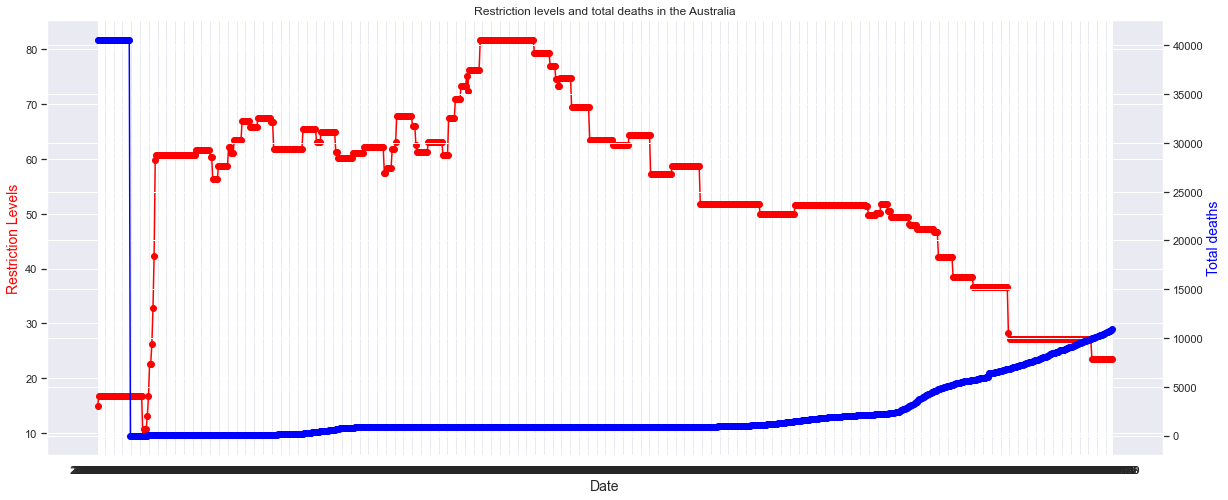

In [179]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_aus2["restriction"],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("Date", fontsize = 14)
# set y-axis label
ax.set_ylabel("Restriction Levels",
              color="red",
              fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_aus2["total_deaths"],color="blue",marker="o")
ax2.set_ylabel("Total deaths",color="blue",fontsize=14)
plt.title('Restriction levels and total deaths in the Australia')
plt.show()

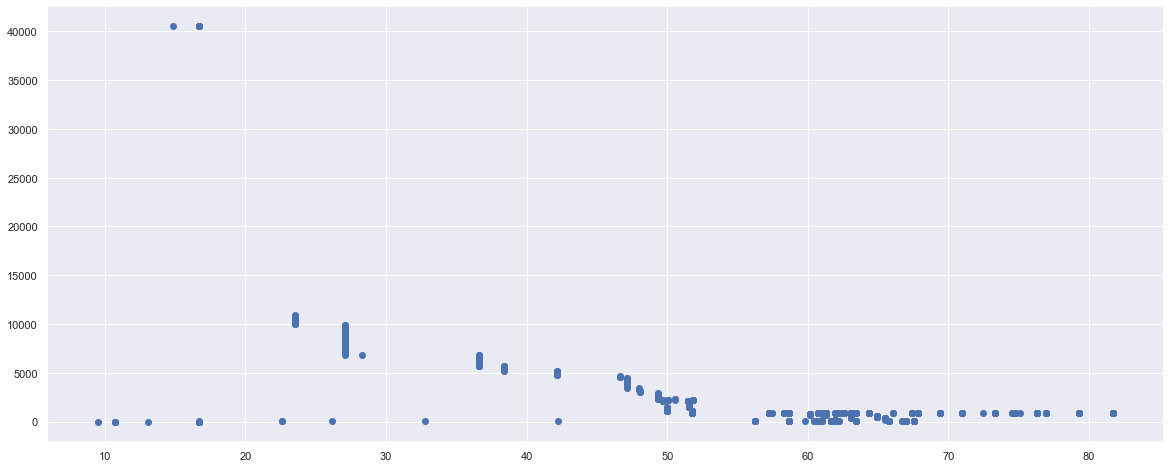

In [64]:
plt.scatter(df_aus2["restriction"], df_aus2["total_deaths"])

### Sweden

In [65]:
df3 = pd.read_csv(r'clean_data.csv')
df3_new = df3[['date','location','total_deaths']]
df3_new.head()

date   location  total_deaths
0  2020-02-01  Australia  40539.314675
1  2020-02-02  Australia  40539.314675
2  2020-02-03  Australia  40539.314675
3  2020-02-04  Australia  40539.314675
4  2020-02-05  Australia  40539.314675

In [66]:
sweden_df = df3_new[(df3_new['location'] == 'Sweden')]
df_swe = sweden_df[['date', 'total_deaths']]
df_swe.head()

date  total_deaths
912  2020-02-01  40539.314675
913  2020-02-02  40539.314675
914  2020-02-03  40539.314675
915  2020-02-04  40539.314675
916  2020-02-05  40539.314675

In [67]:
df_swe1 = df_swe.set_index('date')
df_swe1

total_deaths
date                    
2020-02-01  40539.314675
2020-02-02  40539.314675
2020-02-03  40539.314675
2020-02-04  40539.314675
2020-02-05  40539.314675
...                  ...
2022-07-27  19249.000000
2022-07-28  19358.000000
2022-07-29  19358.000000
2022-07-30  19358.000000
2022-07-31  19358.000000

[912 rows x 1 columns]

In [68]:
swe_data = restriction_data[(restriction_data['Country'] == 'Sweden')]
swe_new = swe_data[['Day','restriction']]
swe_new.head()

Day  restriction
143292  2020-02-01         13.1
143293  2020-02-02         13.1
143294  2020-02-03         13.1
143295  2020-02-04         13.1
143296  2020-02-05         13.1

In [69]:
df_swe2 = swe_new.set_index('Day')
df_swe2

restriction
Day                    
2020-02-01        13.10
2020-02-02        13.10
2020-02-03        13.10
2020-02-04        13.10
2020-02-05        13.10
...                 ...
2022-07-15        19.05
2022-07-16        19.05
2022-07-17        19.05
2022-07-18        19.05
2022-07-19        19.05

[900 rows x 1 columns]

In [70]:
# Aligning index
df_swe2["total_deaths"] = df_swe1.total_deaths

# removing Missing Values
df_swe2.dropna(inplace=True)
  
df_swe2.head(10)

restriction  total_deaths
Day                                  
2020-02-01         13.1  40539.314675
2020-02-02         13.1  40539.314675
2020-02-03         13.1  40539.314675
2020-02-04         13.1  40539.314675
2020-02-05         13.1  40539.314675
2020-02-06         13.1  40539.314675
2020-02-07         13.1  40539.314675
2020-02-08         13.1  40539.314675
2020-02-09         13.1  40539.314675
2020-02-10         13.1  40539.314675

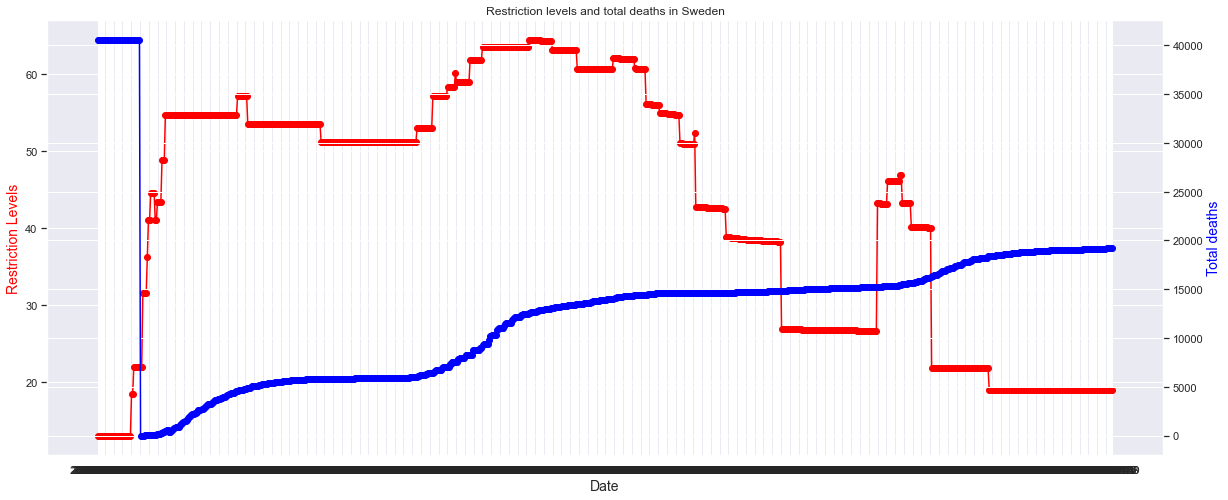

In [71]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_swe2["restriction"],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("Date", fontsize = 14)
# set y-axis label
ax.set_ylabel("Restriction Levels",
              color="red",
              fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_swe2["total_deaths"],color="blue",marker="o")
ax2.set_ylabel("Total deaths",color="blue",fontsize=14)
plt.title('Restriction levels and total deaths in Sweden')
plt.show()

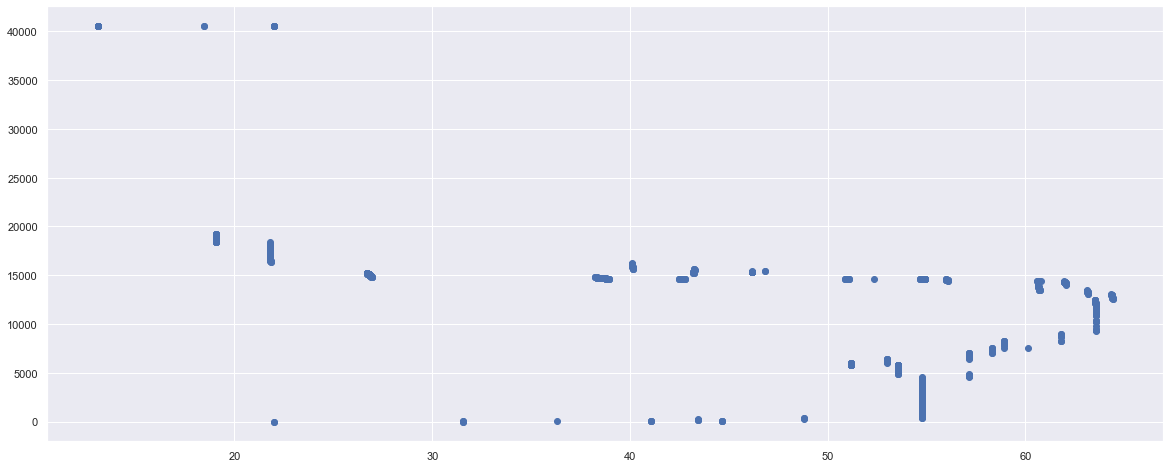

In [72]:
plt.scatter(df_swe2["restriction"], df_swe2["total_deaths"])

## Comparing the UK, Australia and Sweden in terms of restriction levels to deaths correlation

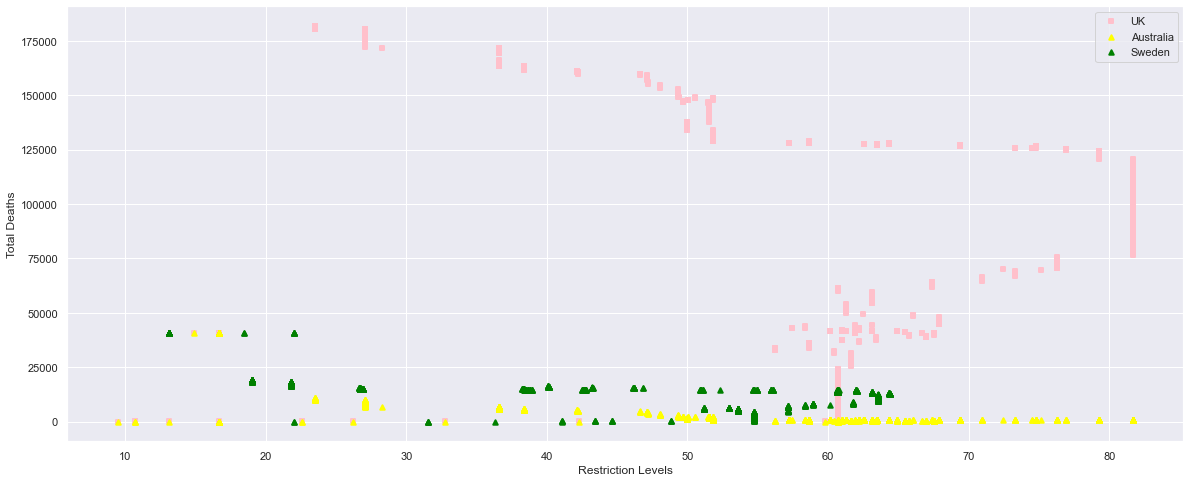

In [73]:
plt.scatter(df_final['restriction'], df_final['total_deaths'], c ="pink",
            linewidths = 2,
            marker ="s",
            s = 20)
 
plt.scatter(df_aus2['restriction'], df_aus2['total_deaths'], c ="yellow",
            linewidths = 2,
            marker ="^",
            s = 20)

plt.scatter(df_swe2['restriction'], df_swe2['total_deaths'], c ="green",
            linewidths = 2,
            marker ="^",
            s = 20)

 
plt.xlabel("Restriction Levels")
plt.ylabel("Total Deaths")
plt.gca().legend(('UK','Australia', 'Sweden'))
plt.show()

## Bringing in a third dataset showing actice and recovered cases

**Having Confirmed** 

**Deaths**

**Recovered** 

**Active**

In [180]:
#Import a third dataset

df2 = pd.read_csv('covid_19_clean_complete.csv')
df2.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

### Cleaning dataset

In [181]:
#Drop columns 

df2 = df2.drop(columns = ['Province/State','Lat','Long'])

df2.head()

Country/Region        Date  Confirmed  Deaths  Recovered  Active  \
0    Afghanistan  2020-01-22          0       0          0       0   
1        Albania  2020-01-22          0       0          0       0   
2        Algeria  2020-01-22          0       0          0       0   
3        Andorra  2020-01-22          0       0          0       0   
4         Angola  2020-01-22          0       0          0       0   

              WHO Region  
0  Eastern Mediterranean  
1                 Europe  
2                 Africa  
3                 Europe  
4                 Africa

In [182]:
df2.isnull().values.any()

False

In [183]:
#focusing on the three countries United Kingdom, Sweden and Australia

data_three2 = df2[(df2['Country/Region'] == 'United Kingdom') | (df2['Country/Region'] == 'Sweden') | (df2['Country/Region'] == 'Australia')]
data_three2

Country/Region        Date  Confirmed  Deaths  Recovered  Active  \
8           Australia  2020-01-22          0       0          0       0   
9           Australia  2020-01-22          0       0          0       0   
10          Australia  2020-01-22          0       0          0       0   
11          Australia  2020-01-22          0       0          0       0   
12          Australia  2020-01-22          0       0          0       0   
...               ...         ...        ...     ...        ...     ...   
49028  United Kingdom  2020-07-27     300111   45759          0  254352   
49052  United Kingdom  2020-07-27          3       0          3       0   
49053  United Kingdom  2020-07-27          8       1          7       0   
49054  United Kingdom  2020-07-27         99       2         36      61   
49059  United Kingdom  2020-07-27         13       0         13       0   

            WHO Region  
8      Western Pacific  
9      Western Pacific  
10     Western Pacific  
11     Western Pacific  
12     Western Pacific  
...                ...  
49028           Europe  
49052           Europe  
49053           Europe  
49054           Europe  
49059           Europe  

[3760 rows x 7 columns]

### New cases of covid19 reported in three countries (UK, Sweden and Australia)

In [184]:
# new cases 
temp = data_three2.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan
# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']
# merging new values
data_three2 = pd.merge(data_three2, temp, on=['Country/Region', 'Date'])
# filling na with 0
data_three2 = data_three2.fillna(0)
# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
data_three2[cols] = data_three2[cols].astype('int')
# 
data_three2['New cases'] = data_three2['New cases'].apply(lambda x: 0 if x<0 else x)



In [185]:
data_three2.head(20)

Country/Region        Date  Confirmed  Deaths  Recovered  Active  \
0        Australia  2020-01-22          0       0          0       0   
1        Australia  2020-01-22          0       0          0       0   
2        Australia  2020-01-22          0       0          0       0   
3        Australia  2020-01-22          0       0          0       0   
4        Australia  2020-01-22          0       0          0       0   
5        Australia  2020-01-22          0       0          0       0   
6        Australia  2020-01-22          0       0          0       0   
7        Australia  2020-01-22          0       0          0       0   
8           Sweden  2020-01-22          0       0          0       0   
9   United Kingdom  2020-01-22          0       0          0       0   
10  United Kingdom  2020-01-22          0       0          0       0   
11  United Kingdom  2020-01-22          0       0          0       0   
12  United Kingdom  2020-01-22          0       0          0       0   
13  United Kingdom  2020-01-22          0       0          0       0   
14  United Kingdom  2020-01-22          0       0          0       0   
15  United Kingdom  2020-01-22          0       0          0       0   
16  United Kingdom  2020-01-22          0       0          0       0   
17  United Kingdom  2020-01-22          0       0          0       0   
18  United Kingdom  2020-01-22          0       0          0       0   
19  United Kingdom  2020-01-22          0       0          0       0   

         WHO Region  New cases  New deaths  New recovered  
0   Western Pacific          0           0              0  
1   Western Pacific          0           0              0  
2   Western Pacific          0           0              0  
3   Western Pacific          0           0              0  
4   Western Pacific          0           0              0  
5   Western Pacific          0           0              0  
6   Western Pacific          0           0              0  
7   Western Pacific          0           0              0  
8            Europe          0           0              0  
9            Europe          0           0              0  
10           Europe          0           0              0  
11           Europe          0           0              0  
12           Europe          0           0              0  
13           Europe          0           0              0  
14           Europe          0           0              0  
15           Europe          0           0              0  
16           Europe          0           0              0  
17           Europe          0           0              0  
18           Europe          0           0              0  
19           Europe          0           0              0

###  Saving final data to a CSV file

In [186]:
data_three2.to_csv('final_COVID-19-clean-complete.csv')

### Ploting three countries total confirmed, total deaths, daily new cases and daily new deaths

In [187]:
#United Kingdom

data_three2 = pd.read_csv('final_COVID-19-clean-complete.csv', parse_dates=['Date'])
UK = data_three2[data_three2['Country/Region'] == 'United Kingdom']
base = alt.Chart(UK).mark_bar().encode(
    x='monthdate(Date):O',
).properties(
    width=500
)
red = alt.value('#f54242')
base.encode(y = 'Confirmed').properties(title = 'Total Confirmed')|base.encode(y='Deaths', color = red).properties(title = 'Total Deaths')
red = alt.value('#f54242')
base.encode(y = 'New cases').properties(title = 'Daily New Cases')|base.encode(y='New deaths', color = red).properties(title = 'Daily New Deaths')

alt.HConcatChart(...)

In [188]:
#Sweden

data_three2 = pd.read_csv('final_COVID-19-clean-complete.csv', parse_dates=['Date'])
SE = data_three2[data_three2['Country/Region'] == 'Sweden']

base = alt.Chart(SE).mark_bar().encode(
    x='monthdate(Date):O',
).properties(
    width=500
)
yellow = alt.value('#ffce03')
base.encode(y = 'Confirmed').properties(title = 'Total Confirmed')|base.encode(y='Deaths', color = yellow).properties(title = 'Total Deaths')
yellow = alt.value('#ffce03')
base.encode(y = 'New cases').properties(title = 'Daily New Cases')|base.encode(y='New deaths', color = yellow).properties(title = 'Daily New Deaths')

alt.HConcatChart(...)

In [189]:
#Australia

data_three2 = pd.read_csv('final_COVID-19-clean-complete.csv', parse_dates=['Date'])
AUS = data_three2[data_three2['Country/Region'] == 'Australia']

base = alt.Chart(AUS).mark_bar().encode(
    x='monthdate(Date):O',
).properties(
    width=500
)
deepred = alt.value('#E4002B')
base.encode(y = 'Confirmed').properties(title = 'Total Confirmed')|base.encode(y='Deaths', color = deepred).properties(title = 'Total Deaths')
deepred = alt.value('#E4002B')
base.encode(y = 'New cases').properties(title = 'Daily New Cases')|base.encode(y='New deaths', color = deepred).properties(title = 'Daily New Deaths')

alt.HConcatChart(...)

## Demonstrating how the coronavirus spreads

In [190]:
data_three2 = pd.read_csv('final_COVID-19-clean-complete.csv', parse_dates=['Date'])
countries = ['United Kingdom', 'Sweden','Australia']
selected_countries = data_three2[data_three2['Country/Region'].isin(countries)]

In [191]:
alt.Chart(selected_countries).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country/Region',
    color='Country/Region',
    size=alt.Size('New cases:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=800,
    height=300
)

alt.Chart(...)

In [87]:
alt.Chart(selected_countries).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country/Region',
    color='Country/Region',
    size=alt.Size('New deaths:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Daily new deaths')
    ) 
).properties(
    width=800,
    height=300
)

alt.Chart(...)